# Import et Chargement des DF

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
### Dataset description (rows, columns, variable types) and key variable
path_commune = os.path.join("..", "Data", "ofgl-base-communes.csv")
communes = pd.read_csv(path_commune, delimiter=";", low_memory=False)
communes["type"] = "commune"

In [3]:
path_departement = os.path.join("..", "Data", "ofgl-base-departements.csv")
departements = pd.read_csv(path_departement, delimiter=";", low_memory=False)
departements["type"] = "departement"

In [4]:
path_regions = os.path.join("..", "Data", "ofgl-base-regions.csv")
regions = pd.read_csv(path_regions, delimiter=";", low_memory=False)
regions["type"] = "region"

In [5]:
cols_supp = [
    "ordre_analyse1_section1",
    "ordre_analyse1_section2",
    "ordre_analyse1_section3",
    "ordre_analyse2_section1",
    "ordre_analyse2_section2",
    "ordre_analyse2_section3",
    "ordre_analyse3_section1",
    "ordre_analyse3_section2",
    "ordre_analyse3_section3",
    "ordre_analyse4_section1"
]

# Identify missing values and inconsistencies

### Régions

In [6]:
print(f"Taille total: {len(regions)}\n")

Taille total: 22933



In [7]:
print(f"\nDuplicate rows in departements: {regions.duplicated().sum()}")


Duplicate rows in departements: 0


No duplicate rows were detected in the dataset.

In [8]:
regions.isna().sum()

Exercice                                                 0
Outre-mer                                                0
CTU ou Collectivité de Corse                             0
Code Insee 2024 Région                                   0
Nom 2024 Région                                          0
Catégorie                                                0
Code Siren Collectivité                                  0
Siret Budget                                             0
Libellé Budget                                           0
Type de budget                                           0
Nomenclature                                             0
Agrégat                                                  0
Montant                                                  0
Montant en millions                                      0
Population totale                                        0
Montant en € par habitant                                0
code_type_budget                                        

Some columns in the dataset contain missing values. The 
ordre_analyse*_section* columns, which have a large number of nulls, are not 
relevant for the analysis and will be removed. For key columns such as budget, 
population, or region identifiers, no significant missing values are present, so they will 
be used directly in the analysis.

In [9]:
regions.dtypes

Exercice                                               int64
Outre-mer                                             object
CTU ou Collectivité de Corse                          object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions                                  float64
Population totale                                      int64
Montant en € par habitant                            float64
code_type_budget        

All columns retained for analysis have consistent data types and do not require 
modification.

### Départements 

In [10]:
print(f"Taille total: {len(departements)}\n")

Taille total: 290281



In [11]:
print(f"\nDuplicate rows in departements: {departements.duplicated().sum()}")


Duplicate rows in departements: 0


No duplicate rows were detected in the dataset.

In [12]:
departements.isna().sum()

Exercice                                                  0
Outre-mer                                                 0
Code Insee 2024 Région                                    0
Nom 2024 Région                                           0
Strate population 2024                                    0
Rural / urbain                                            0
Code Insee 2024 Département                               0
Nom 2024 Département                                      0
Catégorie                                                 0
Code Siren Collectivité                                   0
Siret Budget                                              0
Libellé Budget                                            0
Type de budget                                            0
Nomenclature                                              0
Agrégat                                                   0
Montant                                                   0
Montant en millions                     

The situation is similar to that of the regions. The ordre_analyse*_section* columns 
will be removed, and no significant missing values are present for the key columns.

In [13]:
departements.dtypes

Exercice                                               int64
Outre-mer                                             object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Strate population 2024                                 int64
Rural / urbain                                        object
Code Insee 2024 Département                           object
Nom 2024 Département                                  object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions     

All columns retained for analysis have consistent data types and do not require 
modification.

### Communes

In [14]:
print(f"Taille total: {len(communes)}\n")

Taille total: 3887010



In [15]:
print(f"\nDuplicate rows in departements: {communes.duplicated().sum()}")


Duplicate rows in departements: 0


no duplicate rows were detected in the dataset

In [16]:
communes.dtypes

Exercice                                   int64
Outre-mer                                 object
Code Insee 2024 Région                     int64
Nom 2024 Région                           object
Code Insee 2024 Département               object
Nom 2024 Département                      object
Code Siren 2024 EPCI                     float64
Nom 2024 EPCI                             object
Strate population 2024                     int64
Commune rurale                            object
Commune de montagne                       object
Commune touristique                       object
Tranche revenu par habitant                int64
Présence QPV                              object
Code Insee 2024 Commune                   object
Nom 2024 Commune                          object
Catégorie                                 object
Code Siren Collectivité                    int64
Code Insee Collectivité                   object
Siret Budget                               int64
Libellé Budget      

Some columns have data type issues that will need to be corrected to ensure 
dataset consistency during cleaning: 
- **Code Siren 2024 EPCI (float64)**: EPCI identifier; will need to be converted to 
integer or string to ensure uniqueness and facilitate grouping. 
 
- **Population totale (float64)**: used to calculate ratios; type is correct but may be 
converted to integer for readability. 
 
- **Exercice / annee_join (int64 / float64)**: fiscal years; the float type may be 
converted to integer during cleaning.

In [17]:
communes.isna().sum()

Exercice                                       0
Outre-mer                                      0
Code Insee 2024 Région                         0
Nom 2024 Région                                0
Code Insee 2024 Département                    0
Nom 2024 Département                           0
Code Siren 2024 EPCI                        1398
Nom 2024 EPCI                               1398
Strate population 2024                         0
Commune rurale                                 0
Commune de montagne                            0
Commune touristique                            0
Tranche revenu par habitant                    0
Présence QPV                                   0
Code Insee 2024 Commune                        0
Nom 2024 Commune                               0
Catégorie                                      0
Code Siren Collectivité                        0
Code Insee Collectivité                        0
Siret Budget                                   0
Libellé Budget      

Firstly, some columns in the dataset, specifically those starting with ordre_analyse*, contain a very large number of missing values. These columns are not relevant for the analysis, as they do not contribute meaningful information for budget, population, or territorial comparisons. Therefore, all ordre_analyse* columns will be removed from the dataset prior to further analysis.

In [18]:
liste_null = [
    "Montant en millions",
    "Compte 2024 Disponible",
    "code_type_budget",
    "annee_join",
    "Population totale du dernier exercice"
]

# Sélectionner les lignes où ces colonnes sont null
liste_null_communes = communes[communes[liste_null].isnull().any(axis=1)]["Nom 2024 Commune"].iloc[0]

# Liste des communes uniques avec des valeurs null pour l'EPCI
print(f"Commune with missing values: {liste_null_communes}")

Commune with missing values: Saint-Martin-de-Seignanx


In [19]:
occurence = communes[communes["Nom 2024 Commune"] == "Saint-Martin-de-Seignanx"].count().max()

print(f"Numbre of occurences of the commune 'Saint-Martin-de-Seignanx': {occurence}")

Numbre of occurences of the commune 'Saint-Martin-de-Seignanx': 225


The single row with missing values corresponds to a negligible part of the dataset. Since all other rows for the same commune contain complete and valid information, this row can be safely removed without affecting the analysis.

In [20]:
# Sélectionner les lignes où Code Siren 2024 EPCI ou Nom 2024 EPCI est null
island_communes = communes[communes["Code Siren 2024 EPCI"].isnull() | communes["Nom 2024 EPCI"].isnull()]

# Liste des communes uniques avec des valeurs null pour l'EPCI
print(f"Commune with no Code Siren or EPCI name: {list(island_communes['Nom 2024 Commune'].unique())}")

Commune with no Code Siren or EPCI name: ['Île-de-Bréhat', 'Île-de-Sein', 'Ouessant', "L'Île-d'Yeu"]


Some island communes, such as Île-de-Bréhat or Ouessant, do not have a Code Siren 2024 EPCI due to their administrative and insular status. These missing values are meaningful; however, for computational purposes, they will be replaced with 0 while retaining the information that these communes do not belong to an intercommunal structure.

# Descriptive statistics

### Régions

In [21]:
# Create cleaned datasets by removing rows with Montant en € par habitant <= 0
# This is done to ensure meaningful descriptive statistics and visualizations
# Note: zeros and extreme values are retained in the original dataset for outlier analysis
clean_regions = regions[regions["Montant en € par habitant"] > 0]

In [22]:
clean_regions.head()

,Exercice,Outre-mer,CTU ou Collectivité de Corse,Code Insee 2024 Région,Nom 2024 Région,Catégorie,Code Siren Collectivité,Siret Budget,Libellé Budget,Type de budget,...,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population municipale,Montant en € par habitant (population municipale),type
0,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,3.0,NaN,NaN,NaN,NaN,NaN,2021,5052832,39.320328,region
1,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,NaN,NaN,3.0,NaN,NaN,NaN,2021,5052832,27.620849,region
2,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,NaN,NaN,3.0,NaN,NaN,NaN,2021,5052832,0.030988,region
3,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,NaN,NaN,NaN,2.0,NaN,NaN,2021,5052832,0.356865,region
4,2021,Non,Non,27,Bourgogne-Franche-Comté,REG,200053726,20005372600028,REGION BOURGOGNE FRANCHE COMTE,Budget principal,...,NaN,NaN,NaN,NaN,NaN,1.0,2021,2807807,390.537627,region


In [23]:
# Statistiques descriptives globales
clean_regions.describe()

,Exercice,Code Insee 2024 Région,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,ordre_analyse1_section1,...,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population municipale,Montant en € par habitant (population municipale)
count,17461.000000,17461.000000,1.746100e+04,1.746100e+04,1.746100e+04,1.746100e+04,1.746100e+04,1.746100e+04,17461.000000,2045.000000,...,2154.000000,2279.000000,1339.000000,1255.000000,1355.000000,1400.000000,665.000000,17461.000000,1.746100e+04,1.746100e+04
mean,2017.751618,42.328847,2.213699e+08,2.213699e+13,3.095496e+08,3.095496e+02,3.125614e+06,1.438732e+02,1.486341,2.977017,...,3.534355,3.304958,1.943241,2.461355,2.341697,2.340714,1.527820,2017.751618,3.061902e+06,1.464199e+02
std,3.775484,33.076263,1.779945e+07,1.779945e+12,6.597384e+08,6.597384e+02,2.850520e+06,3.455216e+02,0.858019,1.410389,...,1.813143,1.744055,0.802503,1.133749,1.111506,1.086166,0.499601,3.775484,2.804450e+06,3.506082e+02
min,2012.000000,1.000000,2.000523e+08,2.000523e+13,1.455192e-11,1.455192e-17,2.264260e+05,7.386905e-18,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000,2.244690e+05,7.569889e-18
25%,2014.000000,4.000000,2.000538e+08,2.000538e+13,4.354330e+06,4.354330e+00,7.639690e+05,3.668850e+00,1.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,7.417850e+05,3.741037e+00
50%,2018.000000,32.000000,2.321000e+08,2.321000e+13,5.673519e+07,5.673519e+01,2.632683e+06,3.326976e+01,1.000000,3.000000,...,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2018.000000,2.573180e+06,3.393846e+01
75%,2021.000000,75.000000,2.375001e+08,2.375001e+13,2.756414e+08,2.756414e+02,5.106679e+06,1.296467e+02,1.000000,4.000000,...,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2021.000000,5.030890e+06,1.322832e+02
max,2024.000000,94.000000,2.397400e+08,2.397400e+13,6.913281e+09,6.913281e+03,1.242798e+07,4.272554e+03,3.000000,5.000000,...,6.000000,6.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2024.000000,1.231728e+07,4.337789e+03


In [24]:
# Somme des budgets par régions
regions_budget_median = clean_regions.groupby("Nom 2024 Région")["Montant en € par habitant"].median().reset_index()
regions_budget_median = regions_budget_median.rename(columns={"Montant en € par habitant": "Montant Median en € par habitant"})
regions_budget_median["Montant Median en € par habitant"] = regions_budget_median["Montant Median en € par habitant"].round(2)

# Top 5 régions avec le plus haute budget
top5_plus = regions_budget_median.sort_values(by="Montant Median en € par habitant", ascending=False).head(5)
print("Top 5 regions with the most median budget per person:")
display(top5_plus.set_index("Nom 2024 Région"))

# Top 5 régions avec le plus bas budget
top5_moins = regions_budget_median.sort_values(by="Montant Median en € par habitant", ascending=True).head(5)
print("\nTop 5 regions with the least median budget per person:")
display(top5_moins.set_index("Nom 2024 Région"))

Top 5 regions with the most median budget per person:


,Montant Median en € par habitant
Nom 2024 Région,
Guadeloupe,117.45
Corse,65.16
Martinique,52.07
Centre-Val de Loire,51.14
Île-de-France,47.41



Top 5 regions with the least median budget per person:


,Montant Median en € par habitant
Nom 2024 Région,
Nouvelle-Aquitaine,4.98
Provence-Alpes-Côte d'Azur,11.08
La Réunion,20.30
Normandie,21.91
Hauts-de-France,26.52


### Departments



In [25]:
# Create cleaned datasets by removing rows with Montant en € par habitant <= 0
# This is done to ensure meaningful descriptive statistics and visualizations
# Note: zeros and extreme values are retained in the original dataset for outlier analysis
clean_depts = departements[departements["Montant en € par habitant"] > 0]

In [26]:
clean_depts.head()

,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Strate population 2024,Rural / urbain,Code Insee 2024 Département,Nom 2024 Département,Catégorie,Code Siren Collectivité,...,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice,Population municipale,Montant en € par habitant (population municipale),type
0,2020,Non,84,Auvergne-Rhône-Alpes,2,rural,01,Ain,DEPT,220100010,...,NaN,NaN,NaN,NaN,NaN,2020,663720,643350,1.386116,departement
2,2020,Non,32,Hauts-de-France,2,rural,02,Aisne,DEPT,220200026,...,NaN,NaN,NaN,NaN,NaN,2020,545353,534490,50.825955,departement
3,2020,Non,32,Hauts-de-France,2,rural,02,Aisne,DEPT,220200026,...,NaN,NaN,NaN,NaN,NaN,2020,545353,534490,116.362226,departement
4,2020,Non,84,Auvergne-Rhône-Alpes,1,rural,03,Allier,DEPT,220300016,...,NaN,NaN,NaN,NaN,NaN,2020,346156,337988,1.195265,departement
5,2020,Non,93,Provence-Alpes-Côte d'Azur,0,rural,05,Hautes-Alpes,DEPT,220500011,...,NaN,NaN,NaN,NaN,NaN,2020,145309,141284,114.141963,departement


In [27]:
# Statistiques descriptives globales
clean_depts.describe()

,Exercice,Code Insee 2024 Région,Strate population 2024,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,...,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice,Population municipale,Montant en € par habitant (population municipale)
count,183275.000000,183275.000000,183275.000000,1.832750e+05,1.832750e+05,1.832750e+05,1.832750e+05,1.832750e+05,1.832750e+05,183275.000000,...,27514.000000,17804.000000,11283.000000,13094.000000,15338.000000,4144.000000,183275.000000,1.832750e+05,1.832750e+05,1.832750e+05
mean,2017.900979,53.810678,1.929047,2.243524e+08,2.243524e+13,6.630886e+07,6.630886e+01,6.902846e+05,9.899674e+01,2.158881,...,3.192557,1.927264,2.351059,1.999389,2.130069,1.405647,2017.900979,7.081676e+05,6.764367e+05,1.014626e+02
std,3.737703,27.297304,1.426092,4.228508e+06,4.228508e+11,2.476398e+08,2.476398e+02,5.121221e+05,2.576795e+02,0.987300,...,1.815118,0.798204,1.175989,1.024559,0.990912,0.491076,3.737703,5.353757e+05,5.066638e+05,2.638973e+02
min,2012.000000,1.000000,0.000000,2.000470e+08,2.000470e+13,4.547474e-13,4.547474e-19,8.008100e+04,1.311501e-18,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000,8.022700e+04,7.630900e+04,1.339768e-18
25%,2015.000000,28.000000,1.000000,2.221000e+08,2.221000e+13,1.741570e+05,1.741570e-01,3.168880e+05,3.232422e-01,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,3.171390e+05,3.075000e+05,3.320154e-01
50%,2018.000000,53.000000,2.000000,2.245000e+08,2.245000e+13,2.368218e+06,2.368218e+00,5.436480e+05,4.845738e+00,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2018.000000,5.452830e+05,5.297610e+05,4.966303e+00
75%,2021.000000,76.000000,4.000000,2.273000e+08,2.273000e+13,2.852611e+07,2.852611e+01,9.353930e+05,5.701264e+01,3.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2021.000000,1.062362e+06,9.077960e+05,5.849562e+01
max,2024.000000,94.000000,4.000000,2.298500e+08,2.298500e+13,1.061416e+10,1.061416e+04,2.641207e+06,4.938619e+03,3.000000,...,6.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2024.000000,2.636884e+06,2.611293e+06,4.975905e+03


In [28]:
# Somme des budgets par departements
departements_budget = clean_depts.groupby("Nom 2024 Département")["Montant en € par habitant"].median().reset_index()
departements_budget = departements_budget.rename(columns={"Montant en € par habitant": "Montant Median en € par habitant"})
departements_budget["Montant Median en € par habitant"] = departements_budget["Montant Median en € par habitant"].round(2)

# Top 5 departements avec la plus haute dépense par habitant
top5_plus = departements_budget.sort_values(by="Montant Median en € par habitant", ascending=False).head(5)
print("Top 5 departments with the most median budget per person:")
display(top5_plus.set_index("Nom 2024 Département"))

# Top 5 departements avec la plus basse dépense par habitant
top5_moins = departements_budget.sort_values(by="Montant Median en € par habitant", ascending=True).head(5)
print("\nTop 5 departments with the least median budget per person:")
display(top5_moins.set_index("Nom 2024 Département"))

Top 5 departments with the most median budget per person:


,Montant Median en € par habitant
Nom 2024 Département,
Guadeloupe,104.89
Cantal,71.40
Rhône,69.60
Mayotte,56.98
Hautes-Pyrénées,44.44



Top 5 departments with the least median budget per person:


,Montant Median en € par habitant
Nom 2024 Département,
Alpes-Maritimes,0.64
Gironde,0.65
Eure,0.79
Yvelines,0.93
Haute-Garonne,0.93


### Communes

In [29]:
# Create cleaned datasets by removing rows with Montant en € par habitant <= 0
# This is done to ensure meaningful descriptive statistics and visualizations
# Note: zeros and extreme values are retained in the original dataset for outlier analysis
clean_comm = communes[communes["Montant en € par habitant"] > 0]

In [30]:
clean_comm.head()

,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Code Insee 2024 Département,Nom 2024 Département,Code Siren 2024 EPCI,Nom 2024 EPCI,Strate population 2024,Commune rurale,...,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice,type
0,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
1,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
5,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
6,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,200041523.0,Communauté de communes de la Haute Saintonge,2,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,387.0,commune
7,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,670.0,commune


In [31]:
# Statistiques descriptives globales
clean_comm.describe()

,Exercice,Code Insee 2024 Région,Code Siren 2024 EPCI,Strate population 2024,Tranche revenu par habitant,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,...,ordre_analyse1_section3,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice
count,2.763782e+06,2.763782e+06,2.762967e+06,2.763782e+06,2.763782e+06,2.763782e+06,2.763782e+06,2.763782e+06,2.763782e+06,2.763782e+06,...,87661.000000,258734.000000,487913.000000,178552.000000,154447.000000,245342.000000,268082.000000,177947.000000,2.763782e+06,2.763782e+06
mean,2.017813e+03,5.366946e+01,2.129668e+08,2.787221e+00,1.596188e+00,2.141627e+08,2.141627e+13,5.707057e+05,5.707057e-01,3.061756e+03,...,1.954666,3.302948,3.404837,1.656559,2.199162,1.593082,1.954891,1.418495,2.017813e+03,3.124304e+03
std,6.664296e-01,2.445633e+01,2.023316e+07,1.728758e+00,8.015427e-01,3.461705e+06,3.461705e+11,1.365617e+07,1.365617e+01,3.556358e+04,...,0.945418,1.642372,1.644697,0.474858,0.852406,0.703145,1.063874,0.493314,6.664296e-01,3.460952e+04
min,2.017000e+03,1.000000e+00,2.000002e+08,0.000000e+00,0.000000e+00,2.000022e+08,2.000022e+13,5.684342e-14,5.684342e-20,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.017000e+03,1.000000e+00
25%,2.017000e+03,2.800000e+01,2.000660e+08,2.000000e+00,1.000000e+00,2.122017e+08,2.122017e+13,1.113217e+04,1.113217e-02,2.450000e+02,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.017000e+03,2.450000e+02
50%,2.018000e+03,5.200000e+01,2.000698e+08,3.000000e+00,1.000000e+00,2.143020e+08,2.143020e+13,4.844610e+04,4.844610e-02,5.830000e+02,...,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.018000e+03,6.000000e+02
75%,2.018000e+03,7.600000e+01,2.414009e+08,3.000000e+00,2.000000e+00,2.166021e+08,2.166021e+13,1.938335e+05,1.938335e-01,1.528000e+03,...,3.000000,5.000000,5.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.018000e+03,1.595000e+03
max,2.019000e+03,9.400000e+01,2.497401e+08,1.000000e+01,5.000000e+00,2.197402e+08,2.197402e+13,6.772719e+09,6.772719e+03,2.243739e+06,...,3.000000,6.000000,6.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.019000e+03,2.149216e+06


In [32]:
# Somme des budgets par commune
commune_budget = clean_comm.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()
commune_budget = commune_budget.rename(columns={"Montant en € par habitant": "Montant Median en € par habitant"})
commune_budget["Montant Median en € par habitant"] = commune_budget["Montant Median en € par habitant"].round(2)

# Top 5 communes avec le plus de budget
top5_plus = commune_budget.sort_values(by="Montant Median en € par habitant", ascending=False).head(5)
print("Top 5 commune with the most median budget per person:")
display(top5_plus.set_index("Nom 2024 Commune"))

# Top 5 communes avec le moins de budget
top5_moins = commune_budget.sort_values(by="Montant Median en € par habitant", ascending=True).head(5)
print("\nTop 5 commune with the least median budget per person:")
display(top5_moins.set_index("Nom 2024 Commune"))

Top 5 commune with the most median budget per person:


,Montant Median en € par habitant
Nom 2024 Commune,
Rochefourchat,4719.12
Le Mont-Saint-Michel,4555.19
Oulles,4135.86
Bure,3676.36
Carticasi,3483.13



Top 5 commune with the least median budget per person:


,Montant Median en € par habitant
Nom 2024 Commune,
Paris,1.06
Rennes,1.13
Lyon,1.22
Marseille,1.65
Montluçon,2.72


# Visualize Distribution

### Régions

In [33]:
min_date_region = regions['Exercice'].min()
max_date_region = regions['Exercice'].max()

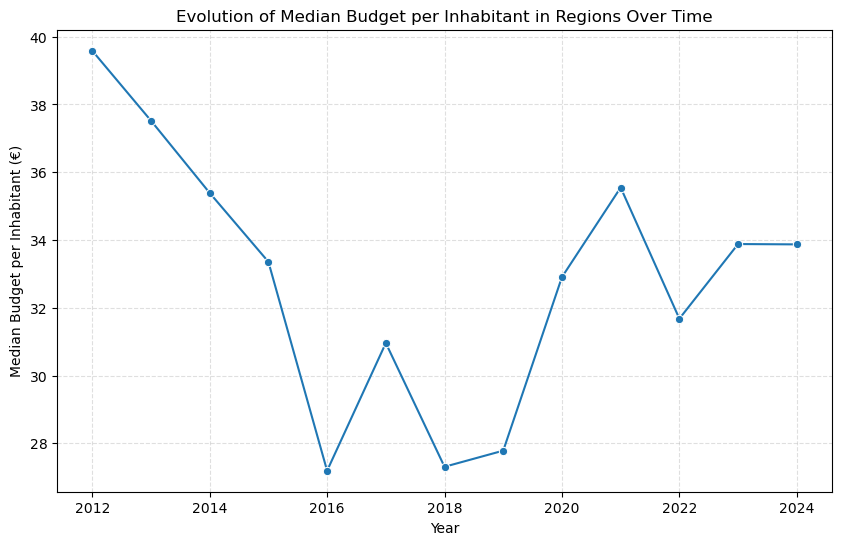

In [34]:
med_per_year = clean_regions.groupby("Exercice")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=med_per_year, x="Exercice", y="Montant en € par habitant", marker="o")
plt.ylabel("Median Budget per Inhabitant (€)")
plt.xlabel("Year")
plt.title("Evolution of Median Budget per Inhabitant in Regions Over Time")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

We can observe a sharp decrease in median expenses per inhabitant across regions between 2012 and 2016, dropping from nearly 30 to 5. Between 2019 and 2021, there was a slight rebound, rising from around 28 to approximately 35. Afterward, the median expenses slightly declined before stabilizing at about 34 in 2024.

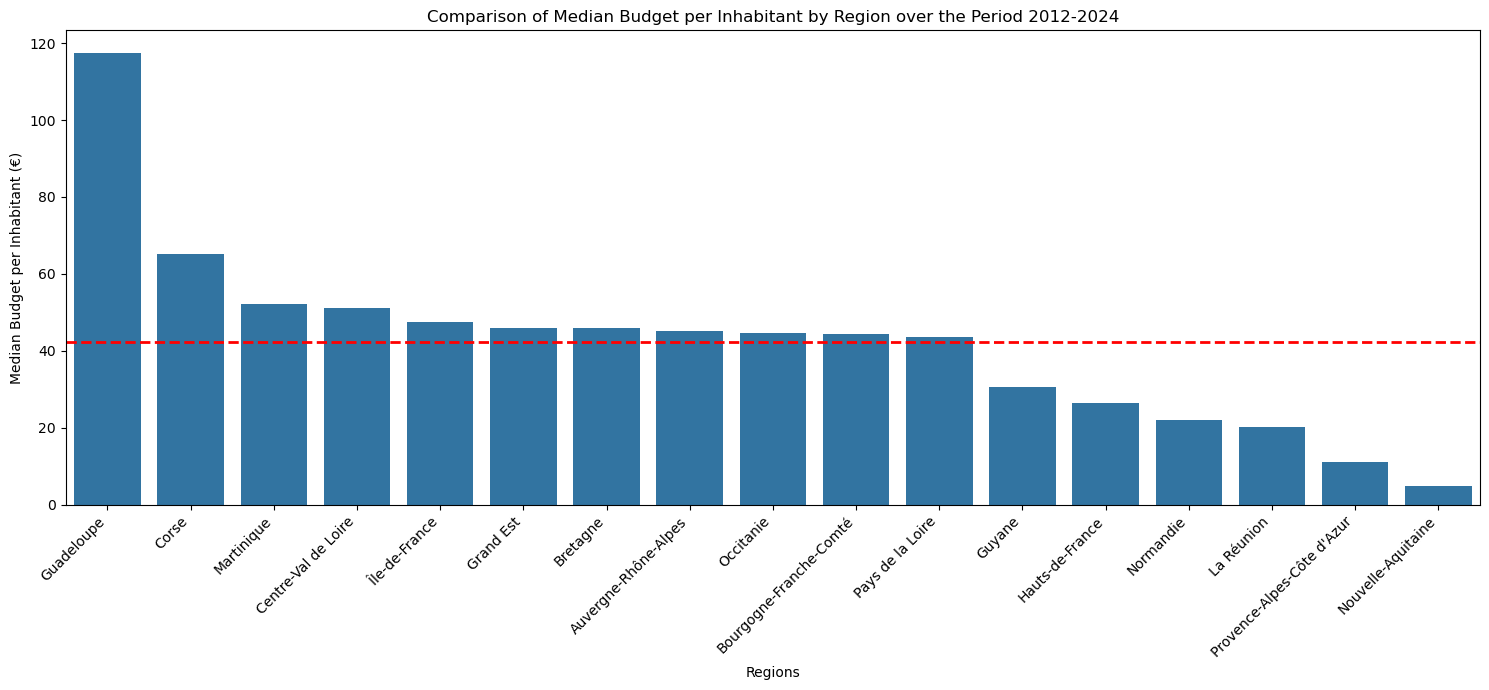

In [35]:
med_reg = clean_regions.groupby("Nom 2024 Région")[["Montant en € par habitant"]].median().reset_index()
med_reg = med_reg.sort_values("Montant en € par habitant", ascending=False)

mean_value = med_reg["Montant en € par habitant"].mean()

plt.figure(figsize=(15,7))
sns.barplot(data=med_reg, x="Nom 2024 Région", y="Montant en € par habitant")

plt.axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f} €')

plt.ylabel("Median Budget per Inhabitant (€)")
plt.xlabel("Regions")
plt.title(f"Comparison of Median Budget per Inhabitant by Region over the Period {min_date_region}-{max_date_region}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As observed previously when examining the top 5 regions with the highest median expenses per inhabitant, Guadeloupe stands out as the region with the largest per capita spending, nearly double that of the second-ranked region. Most other regions have median expenses slightly above the average, while six regions fall below the average, with Nouvelle-Aquitaine being the lowest, at around €5 per inhabitant.

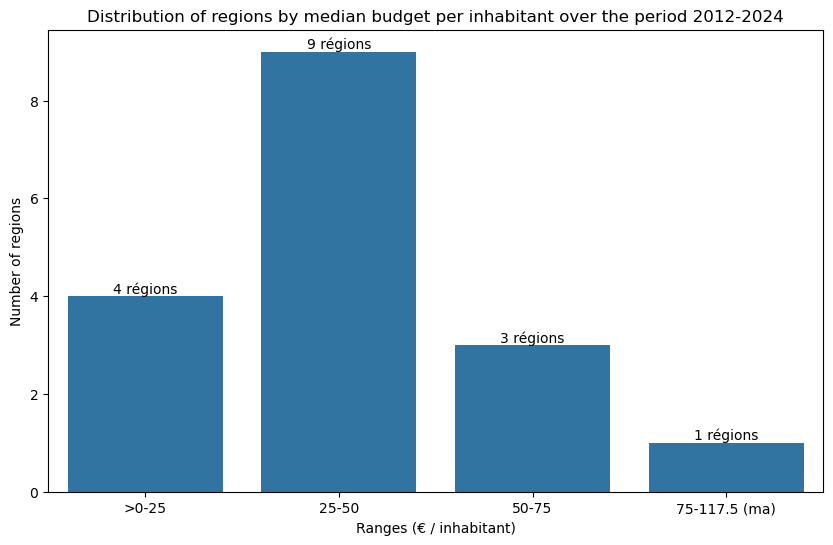

In [36]:
regions_grouped = clean_regions.groupby("Nom 2024 Région")["Montant en € par habitant"].median().reset_index()

max_montant_median = regions_grouped["Montant en € par habitant"].max()
bins = [0, 25, 50, 75, max_montant_median]
labels = [">0-25", "25-50", "50-75", f"75-{max_montant_median:.1f} (ma)"]

regions_grouped["Classe"] = pd.cut(regions_grouped["Montant en € par habitant"], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
ax = sns.countplot(data=regions_grouped, x="Classe")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)) + " régions",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title(f"Distribution of regions by median budget per inhabitant over the period {min_date_region}-{max_date_region}")
plt.xlabel("Ranges (€ / inhabitant)")
plt.ylabel("Number of regions")
plt.show()

The distribution of regions by median budget per inhabitant is as follows: 4 regions fall in the 0–25 € per inhabitant range, 9 regions are between 25–50 €, 3 regions between 50–75 €, and 1 region exceeds 75 € per inhabitant. This highlights that most regions are clustered around the lower to mid-range budgets, with only a single region significantly above the rest.

### Departement

In [37]:
min_date_dept = departements['Exercice'].min()
max_date_dept = departements['Exercice'].max()

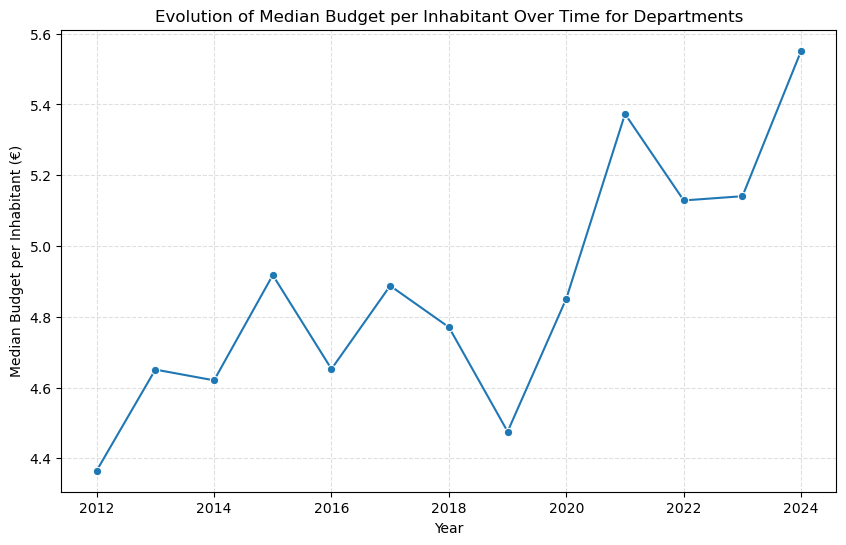

In [38]:
med_per_year = clean_depts.groupby("Exercice")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=med_per_year, x="Exercice", y="Montant en € par habitant", marker="o")
plt.ylabel("Median Budget per Inhabitant (€)")
plt.xlabel("Year")
plt.title("Evolution of Median Budget per Inhabitant Over Time for Departments")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

The evolution of median expenditure per capita in departments has been generally rising since 2012, increasing from around 4.3 in 2012 to approximately 5.5 in 2024, with a slight dip in 2019, when it fell to about 4.5.

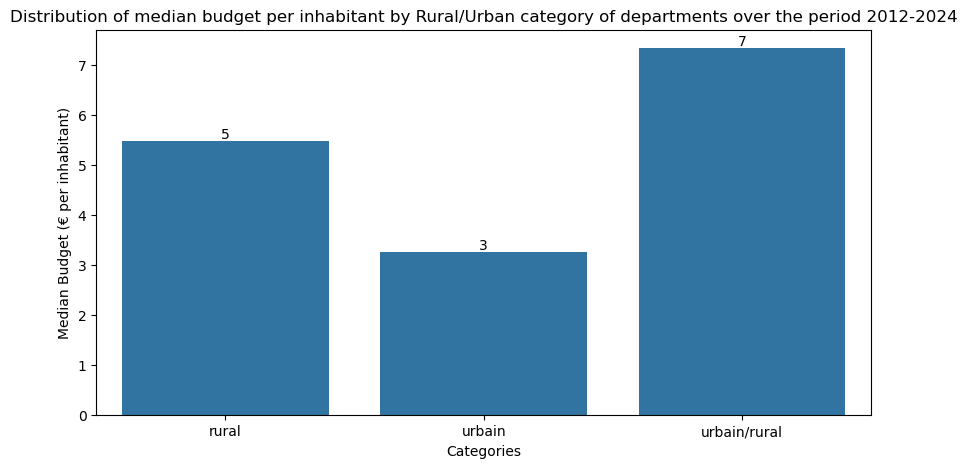

In [39]:
medians_rural_urbain = clean_depts.groupby("Rural / urbain")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=medians_rural_urbain, x="Rural / urbain", y="Montant en € par habitant")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylabel("Median Budget (€ per inhabitant)")
plt.xlabel("Categories")
plt.title(
    f"Distribution of median budget per inhabitant by Rural/Urban category of departments over the period {min_date_dept}-{max_date_dept}"
)
plt.show()


The highest median expenditure per capita is observed in the “urbain/rural” category, at 7 €, followed by rural areas at 5 €, while urban areas have the lowest median, around 3 € per capita.

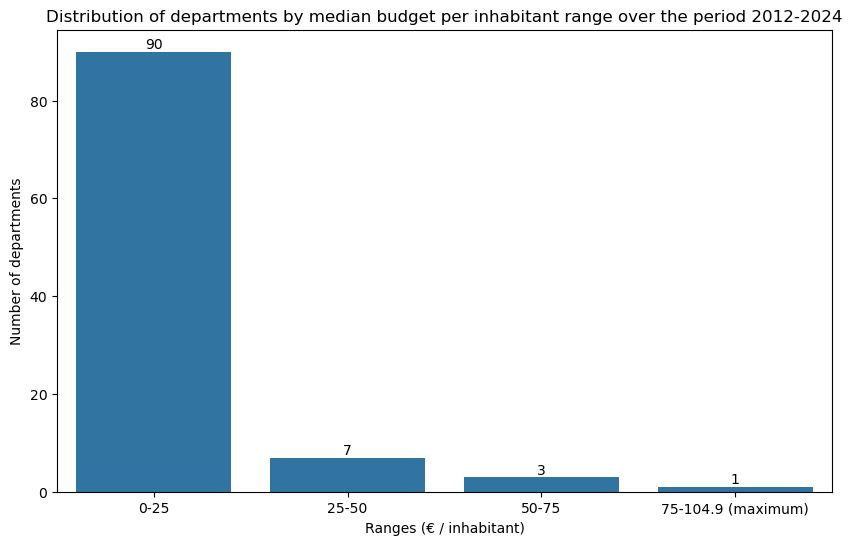

In [40]:
departements_grouped = clean_depts.groupby("Nom 2024 Département")["Montant en € par habitant"].median().reset_index()

max_montant_median = departements_grouped["Montant en € par habitant"].max()
bins = [0, 25, 50, 75, max_montant_median]
labels = ["0-25", "25-50", "50-75", f"75-{max_montant_median:.1f} (maximum)"]

departements_grouped["Classe"] = pd.cut(departements_grouped["Montant en € par habitant"], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
ax = sns.countplot(data=departements_grouped, x="Classe")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title(f"Distribution of departments by median budget per inhabitant range over the period {min_date_dept}-{max_date_dept}")
plt.xlabel("Ranges (€ / inhabitant)")
plt.ylabel("Number of departments")
plt.show()

There are 90 departments in the 0-25 range, and 11 departments in the 25+ range (combining the 25-50, 50-75, and 75-max ranges for clarity).

### Communes

In [41]:
min_date_communes = communes['Exercice'].min()
max_date_communes = communes['Exercice'].max()

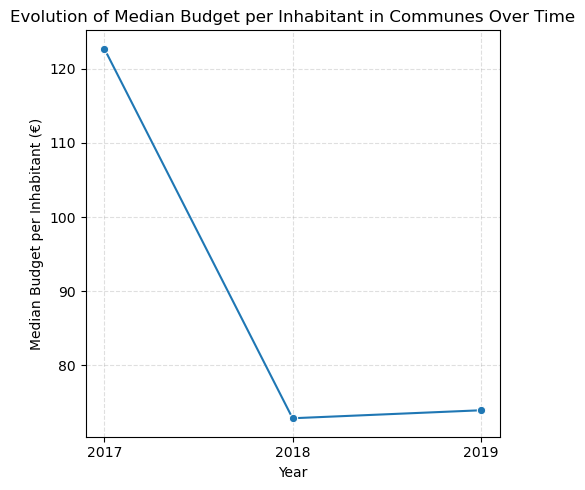

In [42]:
med_per_year = clean_comm.groupby("Exercice")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(5,5))
sns.lineplot(data=med_per_year, x="Exercice", y="Montant en € par habitant", marker="o")
plt.ylabel("Median Budget per Inhabitant (€)")
plt.xlabel("Year")
plt.title("Evolution of Median Budget per Inhabitant in Communes Over Time")
plt.xticks(med_per_year["Exercice"])
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


A sharp decline in the median budget per inhabitant is observed between 2017 and 2018, dropping from around 125 to approximately 60, and remaining close to 60 in 2019.

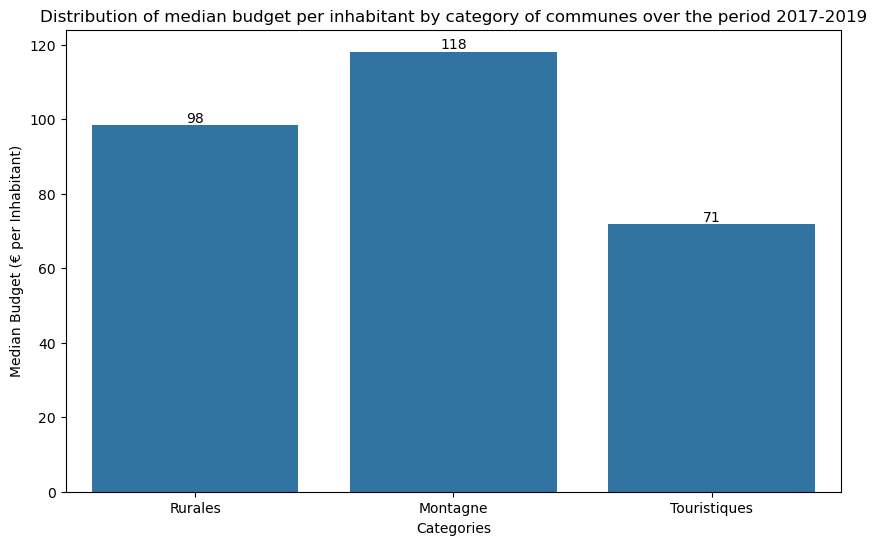

In [43]:
df_rurales = clean_comm[clean_comm["Commune rurale"]=="Oui"]
df_montagne = clean_comm[clean_comm["Commune de montagne"]=="Oui"]
df_touristique = clean_comm[clean_comm["Commune touristique"]=="Oui"]

med_rurales = df_rurales["Montant en € par habitant"].median()
med_montagne = df_montagne["Montant en € par habitant"].median()
med_touristique = df_touristique["Montant en € par habitant"].median()

df_med = pd.DataFrame({
    "Catégorie": ["Rurales", "Montagne", "Touristiques"],
    "Médiane par habitant": [med_rurales, med_montagne, med_touristique]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_med, x="Catégorie", y="Médiane par habitant")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylabel("Median Budget (€ per Inhabitant)")
plt.xlabel("Categories")
plt.title(f"Distribution of median budget per inhabitant by category of communes over the period {min_date_communes}-{max_date_communes}")
plt.show()


In mountainous communes, the median budget per inhabitant is the highest at 118 €, followed by rural communes with 98 €, and urban communes with 71 €.

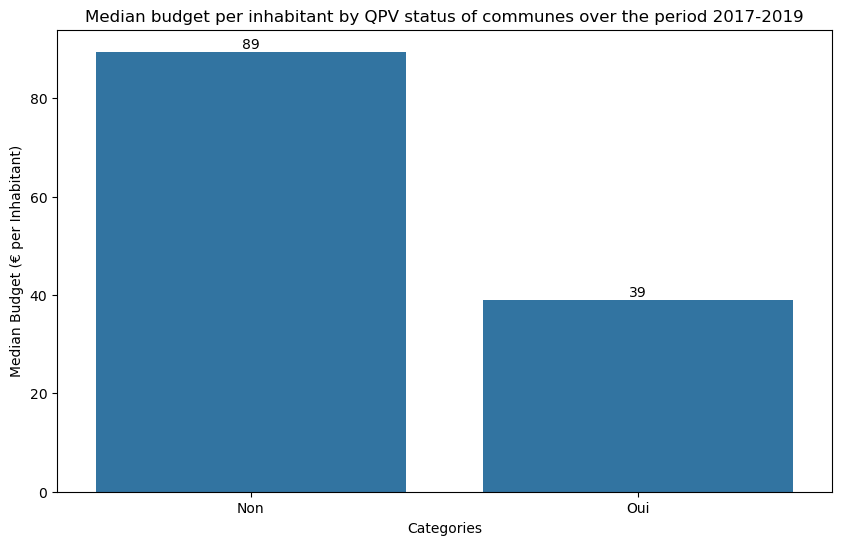

In [44]:
medians_qpv = clean_comm.groupby("Présence QPV")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=medians_qpv, x="Présence QPV", y="Montant en € par habitant")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylabel("Median Budget (€ per Inhabitant)")
plt.xlabel("Categories")
plt.title(f"Median budget per inhabitant by QPV status of communes over the period {min_date_communes}-{max_date_communes}")
plt.show()

Communes without QPV have a median budget of 89 € per inhabitant, compared to 39 € for communes with QPV.

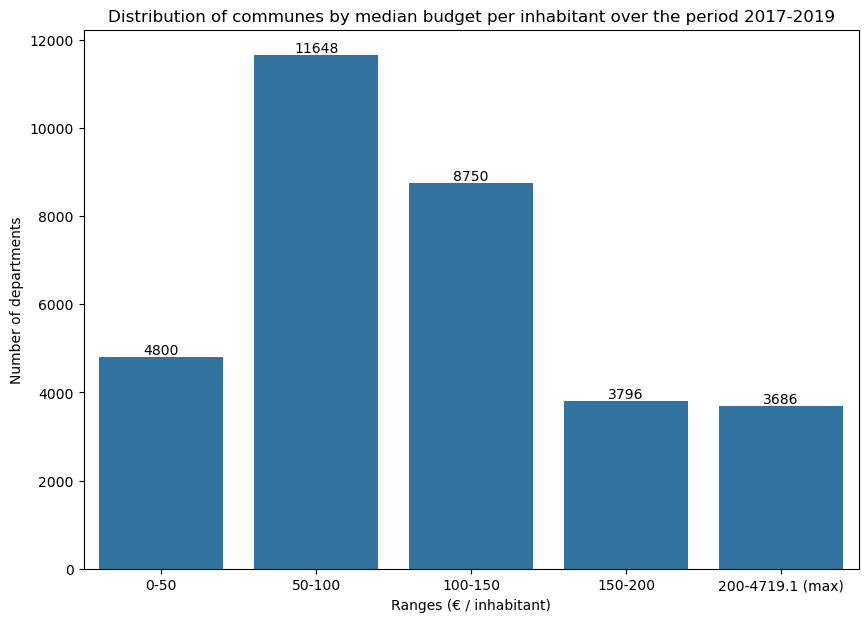

In [45]:
communes_grouped = clean_comm.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()

max_montant_median = communes_grouped["Montant en € par habitant"].max()
bins = [0, 50, 100, 150, 200, max_montant_median]
labels = ["0-50", "50-100", "100-150", "150-200", f"200-{max_montant_median:.1f} (max)"]

communes_grouped["Classe"] = pd.cut(communes_grouped["Montant en € par habitant"], bins=bins, labels=labels)

plt.figure(figsize=(10, 7))
ax = sns.countplot(data=communes_grouped, x="Classe")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title(f"Distribution of communes by median budget per inhabitant over the period {min_date_communes}-{max_date_communes}")
plt.xlabel("Ranges (€ / inhabitant)")
plt.ylabel("Number of departments")
plt.show()

The 0–50, 150–200, and 200–4719 (€ per inhabitant) ranges each contain a similar number of communes, between roughly 3,600 and 4,800. Most communes, however, are concentrated in the 50–100 and 100–150 ranges, with 11,648 and 8,750 communes respectively.

# Outliers

### Régions

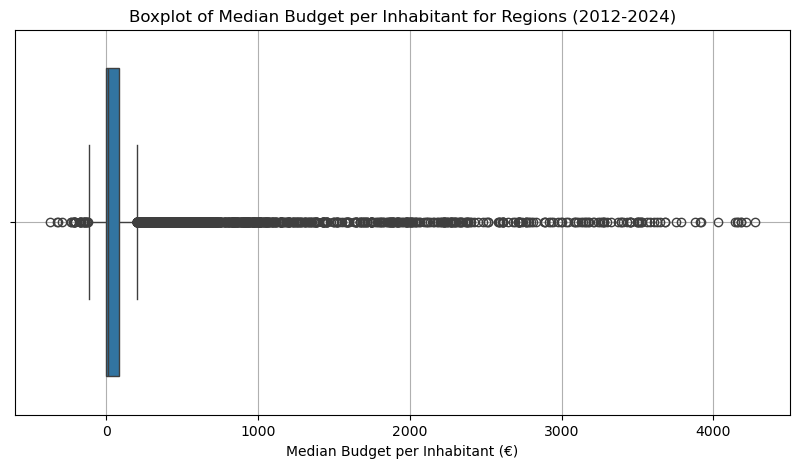

In [46]:
regions_grouped = regions.groupby("Nom 2024 Région")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(data=regions, x="Montant en € par habitant")
plt.xlabel("Median Budget per Inhabitant (€)")
plt.title(f"Boxplot of Median Budget per Inhabitant for Regions ({min_date_region}-{max_date_region})")
plt.grid()
plt.show()

The boxplot shows that most regional values are concentrated between 0 and around 200 € per inhabitant, which corresponds to the interquartile range. However, there is a long tail of higher values extending up to 4,200 €, represented by a continuous line of points, indicating many regions with unusually high per capita budgets. There are also a few negative values, reflecting regions with deficits or accounting adjustments for certain exercises.

### Departement

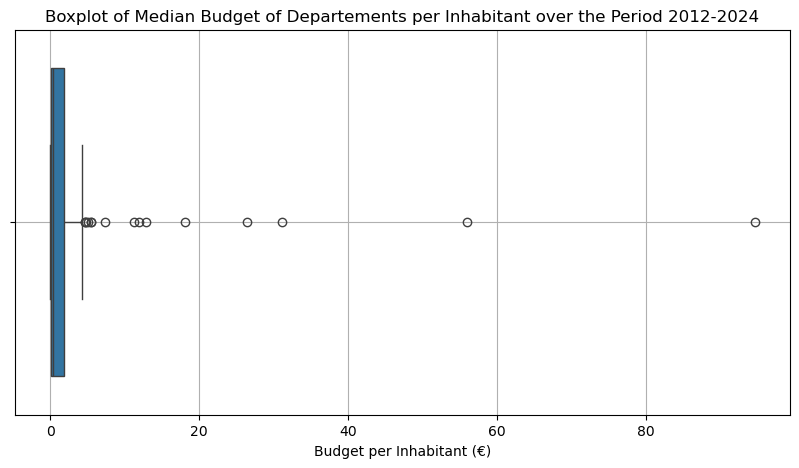

In [47]:
departements_grouped = departements.groupby("Nom 2024 Département")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(x=departements_grouped["Montant en € par habitant"])
plt.xlabel("Budget per Inhabitant (€)")
plt.title(f"Boxplot of Median Budget of Departements per Inhabitant over the Period {min_date_dept}-{max_date_dept}")
plt.grid()
plt.show()

The boxplot for departments shows that most values are concentrated between 0 and around 4 € per inhabitant, representing the interquartile range. There is a small upward tail extending to around 10 €, followed by a few more extreme outliers: two between 20 and 40 €, one around 60 €, and a single value near 100 €, indicating a limited number of departments with unusually high per capita budgets.

### Communes

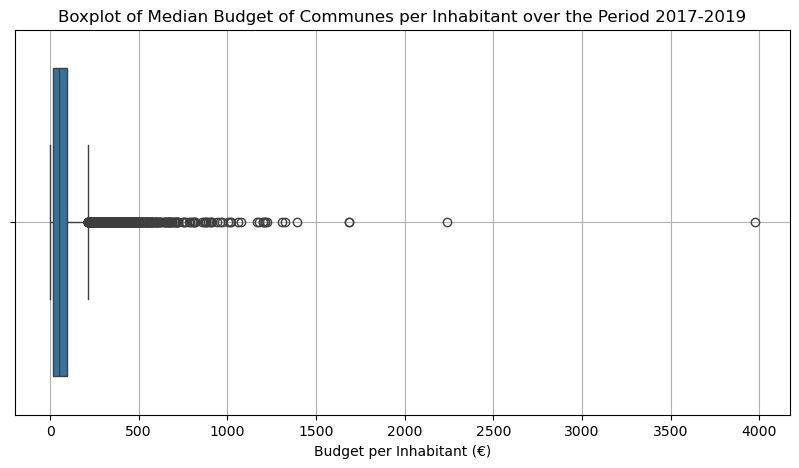

In [48]:
communes_grouped = communes.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(x=communes_grouped["Montant en € par habitant"])
plt.xlabel("Budget per Inhabitant (€)")
plt.title(f"Boxplot of Median Budget of Communes per Inhabitant over the Period {min_date_communes}-{max_date_communes}")
plt.grid()
plt.show()

The boxplot for communes shows that the interquartile range spans from 0 to approximately 100 € per inhabitant, with whiskers extending up to around 250 €. There is a concentrated tail reaching just below 1,500 €, followed by several extreme outliers at 1,750 €, 2,300 €, and one exceeding 4,000 €, highlighting a few communes with exceptionally high per capita budgets.

# Correlation matrix

### Régions

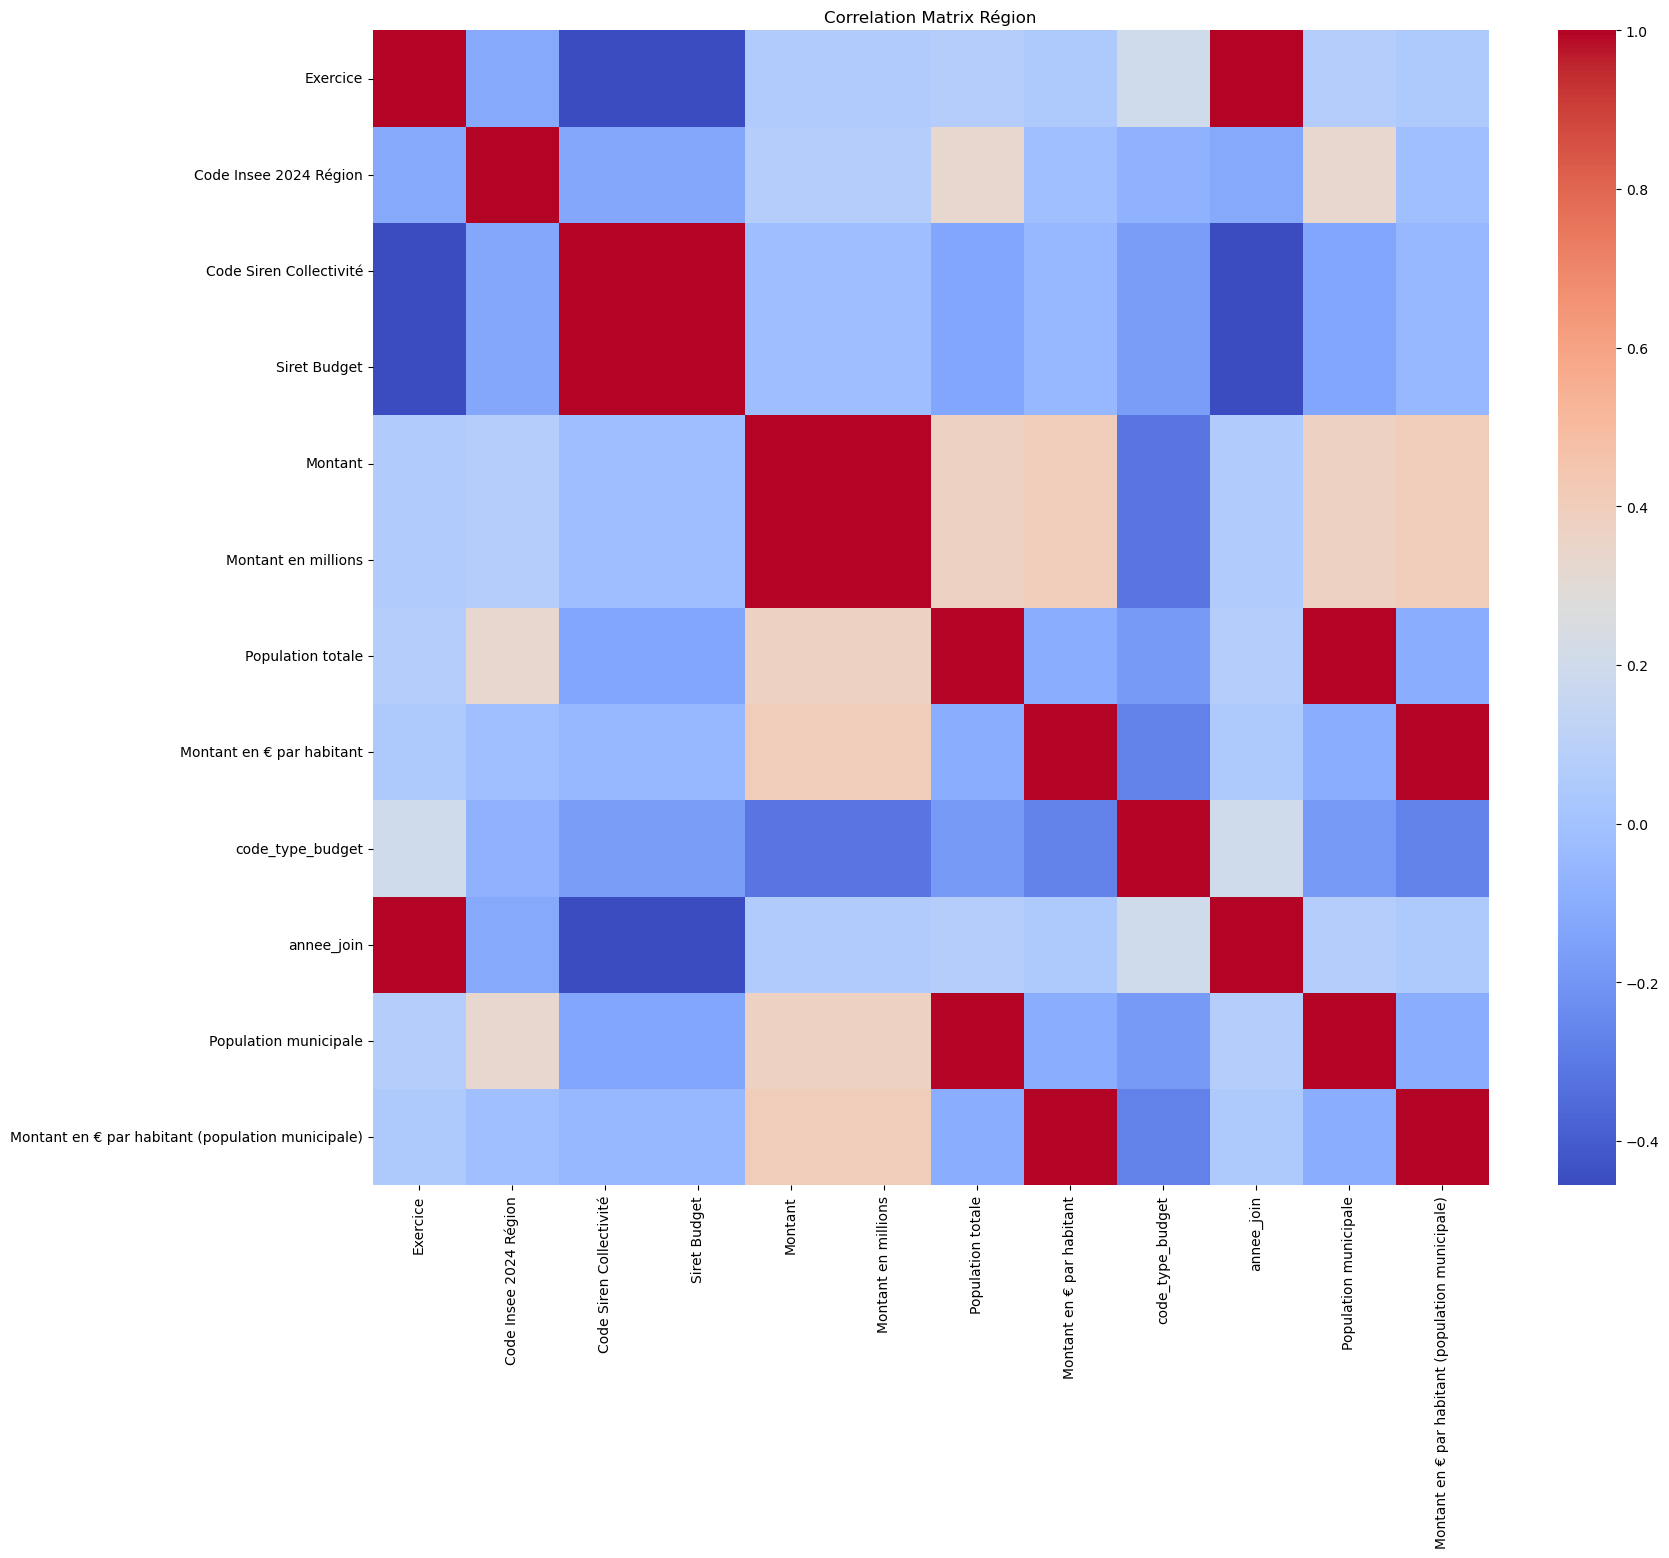

In [49]:
regions_numeric = regions.drop(columns=(col for col in cols_supp)).select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_regions = regions_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_regions, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Région")
plt.show()

The strongest correlations (red) are expected and logical, such as between Exercice and annee_join or Montant and Montant en millions. In addition, moderate correlations (beige, around 0.4) can be observed between population variables (Population totale, Population municipale) and budget amounts, as well as between population and Code Insee, reflecting that larger populations tend to have higher budgets and that some systematic patterns exist across administrative codes.

### Departements

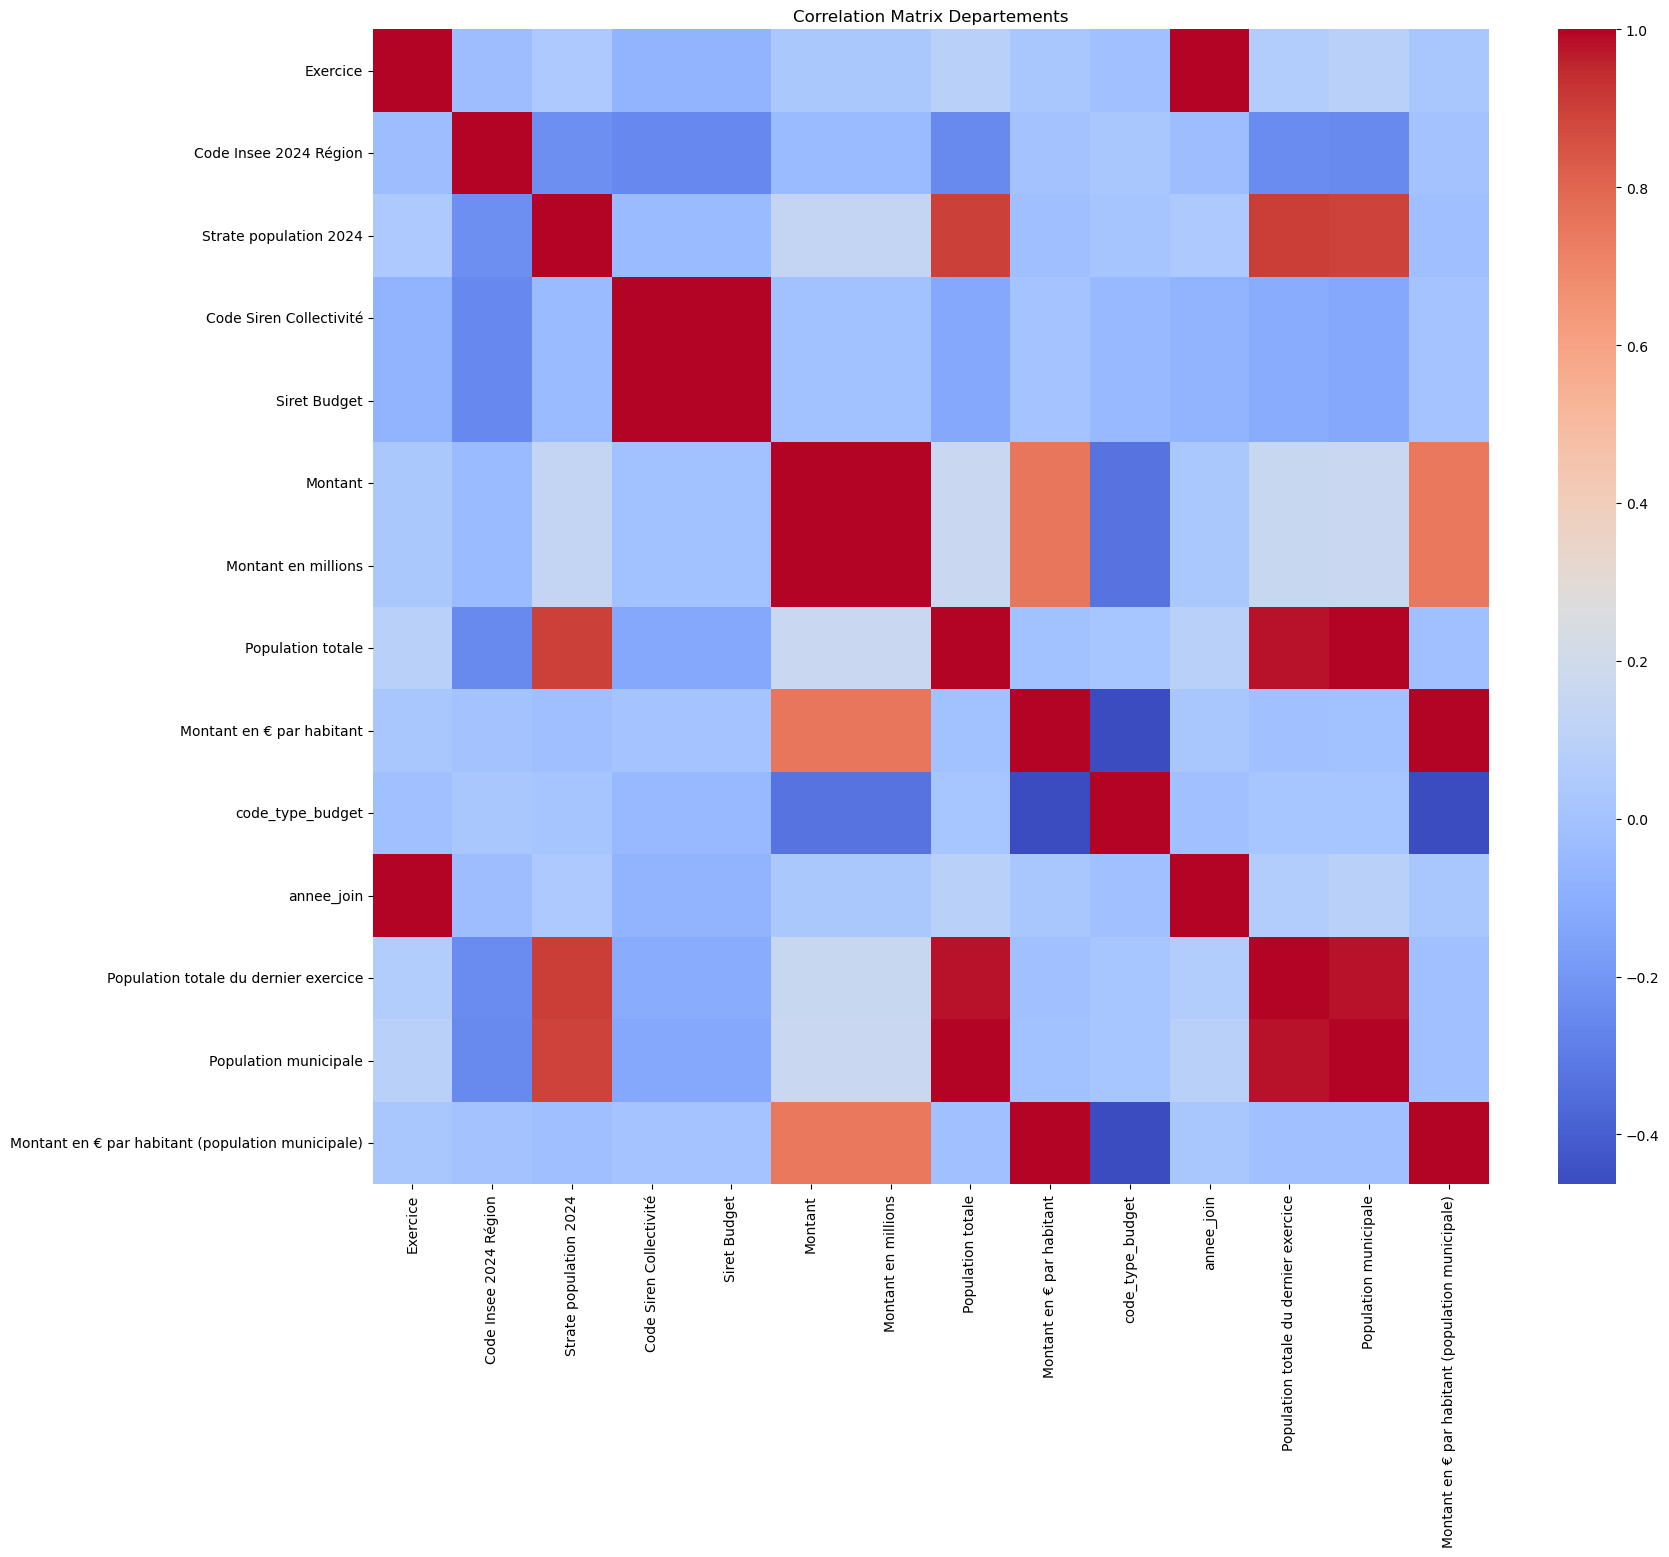

In [50]:
# Select only numerical columns for correlation matrix
departements_numeric = departements.drop(columns=(col for col in cols_supp)).select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_departements = departements_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_departements, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Departements")
plt.show()

For departments, the correlation matrix shows a similar pattern. No unexpected or unusual correlations appear beyond the standard diagonal. The main relationships are logical, such as the strong correlation between municipal population and total population, or between budget variables that are mechanically linked. Overall, the dataset does not exhibit any surprising or problematic correlations at the departmental level.

### Communes

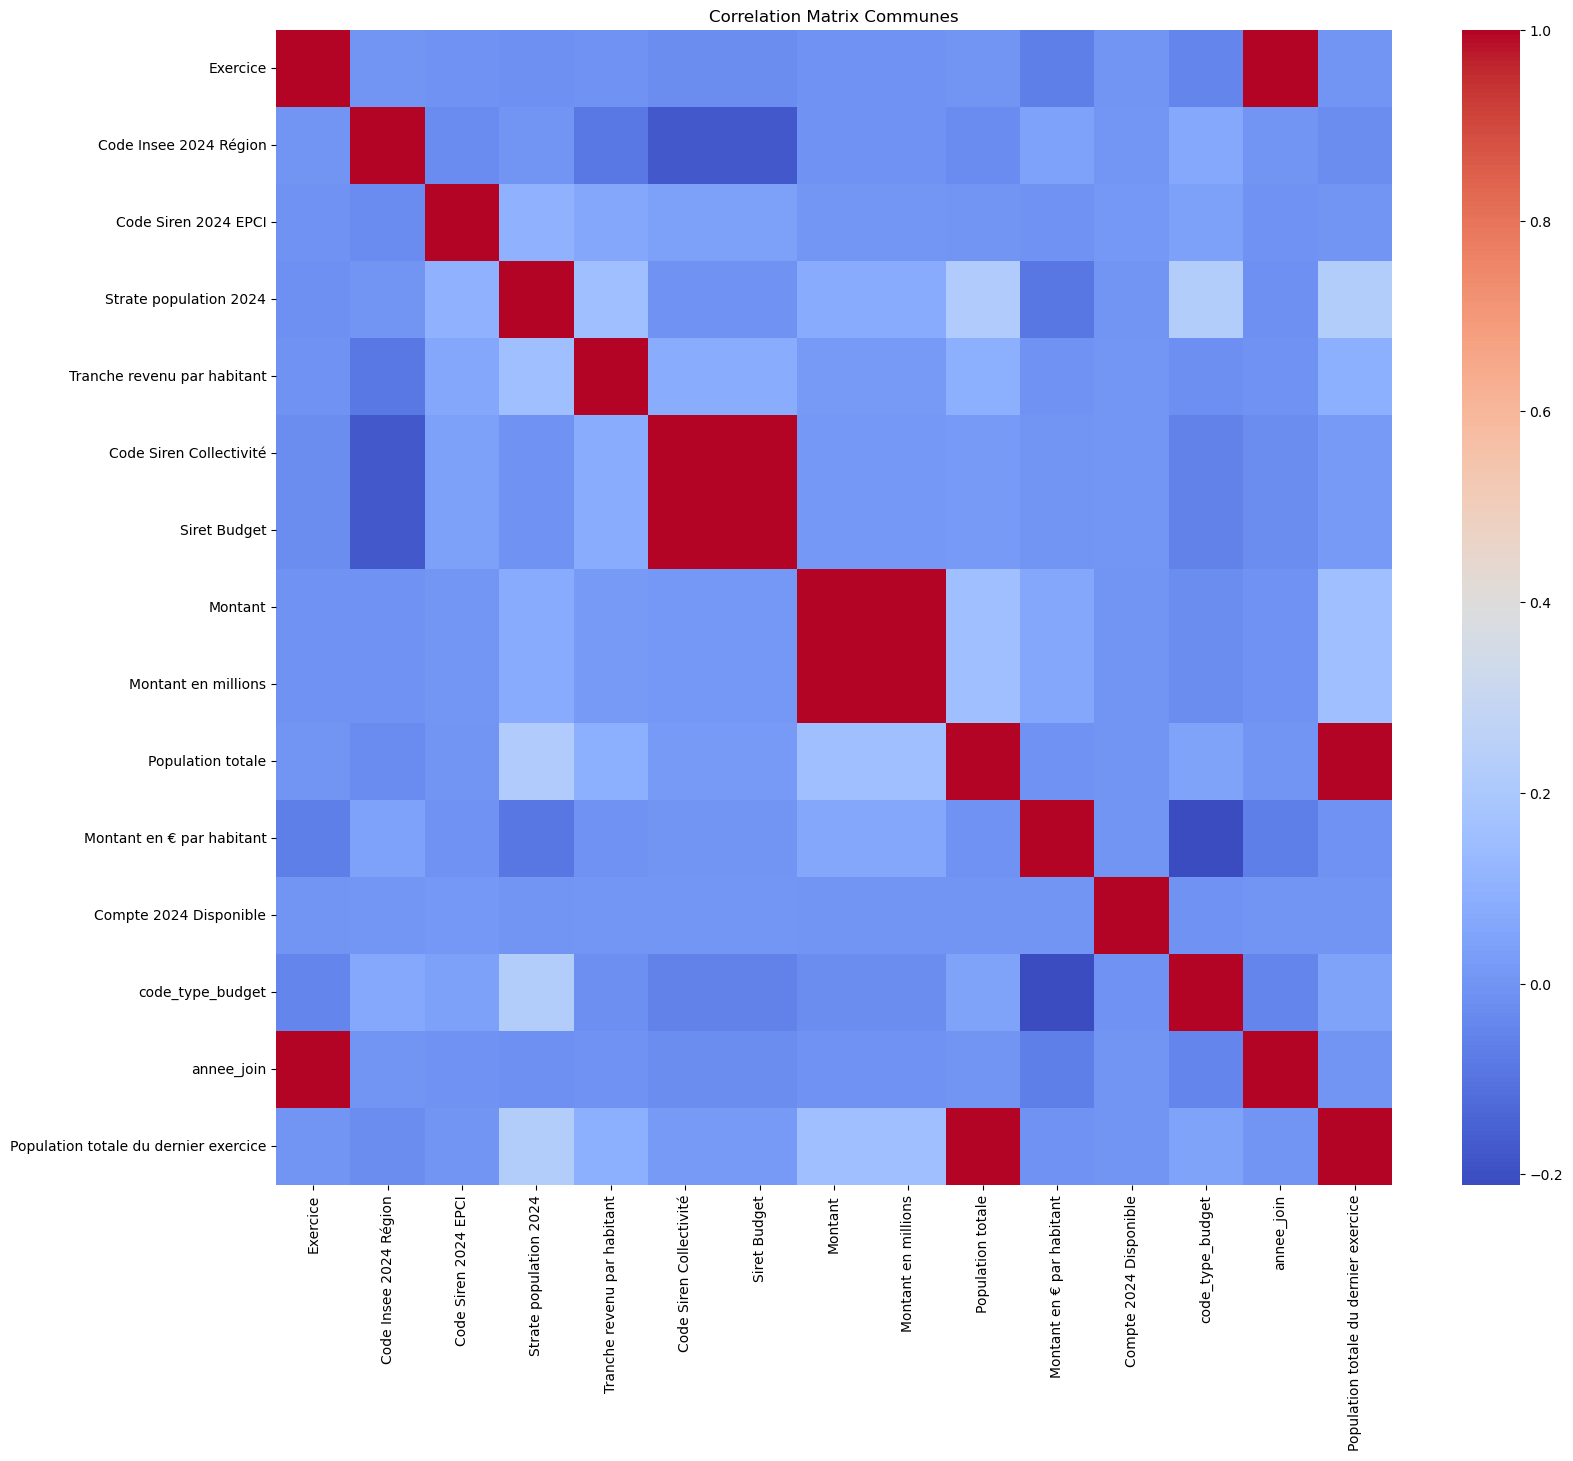

In [51]:
# Select only numerical columns for correlation matrix
communes_numeric = communes.drop(columns=(col for col in cols_supp)).select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = communes_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Communes")
plt.show()

For communes, the correlation matrix shows essentially the same pattern as in the other datasets. Apart from a few expected relationships — such as the strong correlation between annee_join and Exercice — the matrix contains almost no meaningful correlations beyond the diagonal. This confirms that, at the commune level, the variables are largely independent and no unexpected statistical relationships appear.

# Principal Component Analysis

In [52]:
# Déclaration du scaler 
scaler = StandardScaler()

### Régions

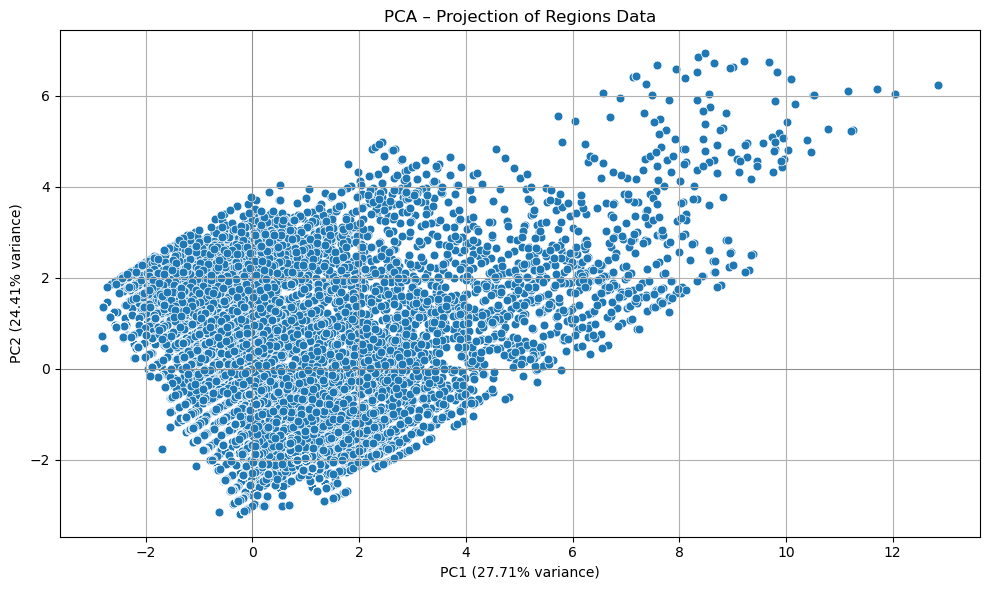

In [53]:
pca_region = PCA(n_components=2)

regions_numeric = regions_numeric.dropna()   # Clean NaN

# Standardize
regions_scaled = scaler.fit_transform(regions_numeric)

# PCA (2 composants)
pca_results_region = pca_region.fit_transform(regions_scaled)

df_pca_regions = pd.DataFrame({
    "PC1": pca_results_region[:, 0],
    "PC2": pca_results_region[:, 1]
})

# Scatterplot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca_regions, s=40)
plt.title("PCA – Projection of Regions Data")
plt.xlabel(f"PC1 ({pca_region.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca_region.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)
plt.grid()
plt.tight_layout()
plt.show()

The PCA projection reveals a clear linear structure along the PC1–PC2 plane, with most regions forming a dense cluster between PC1 values of approximately –2 and 6 and PC2 values between –1 and 4. Beyond this dense core, the points become increasingly dispersed along the positive direction of both components, extending up to around (13, 6). This indicates that while the majority of regions share similar multivariate profiles, a smaller set diverges progressively, contributing more strongly to the principal components.

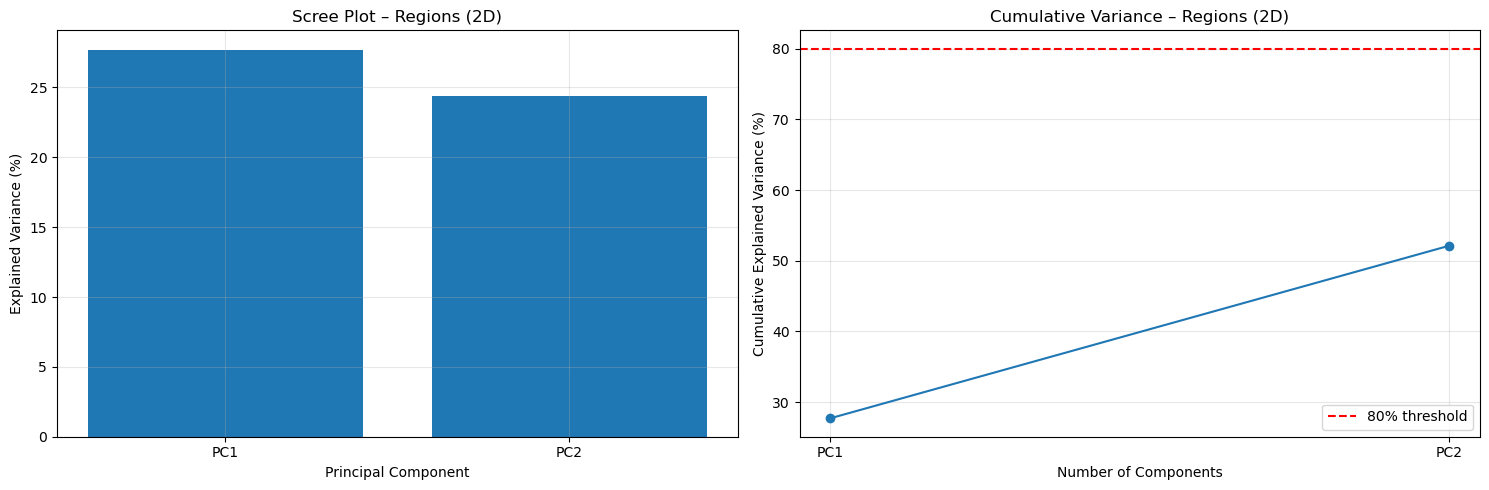

In [54]:
# Explained variance
explained_var = pca_region.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var))], explained_var*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Regions (2D)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var))], cumulative_var*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Regions (2D)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The scree plot shows that the first principal component (PC1) captures approximately 27% of the total variance, while the second component (PC2) adds around 24% more. Together, PC1 and PC2 explain roughly 52% of the variance, indicating that these two components already capture the main structure of the regional data. The cumulative variance plot confirms this, showing how the total variance explained increases as more components are added, but with diminishing returns after the first two. However, 52% is relatively low, suggesting that a significant portion of the variance is still not captured by these two components. This implies that while a 2D representation provides a useful overview, including additional components would give a more complete picture of the regional data and better preserve its variability.

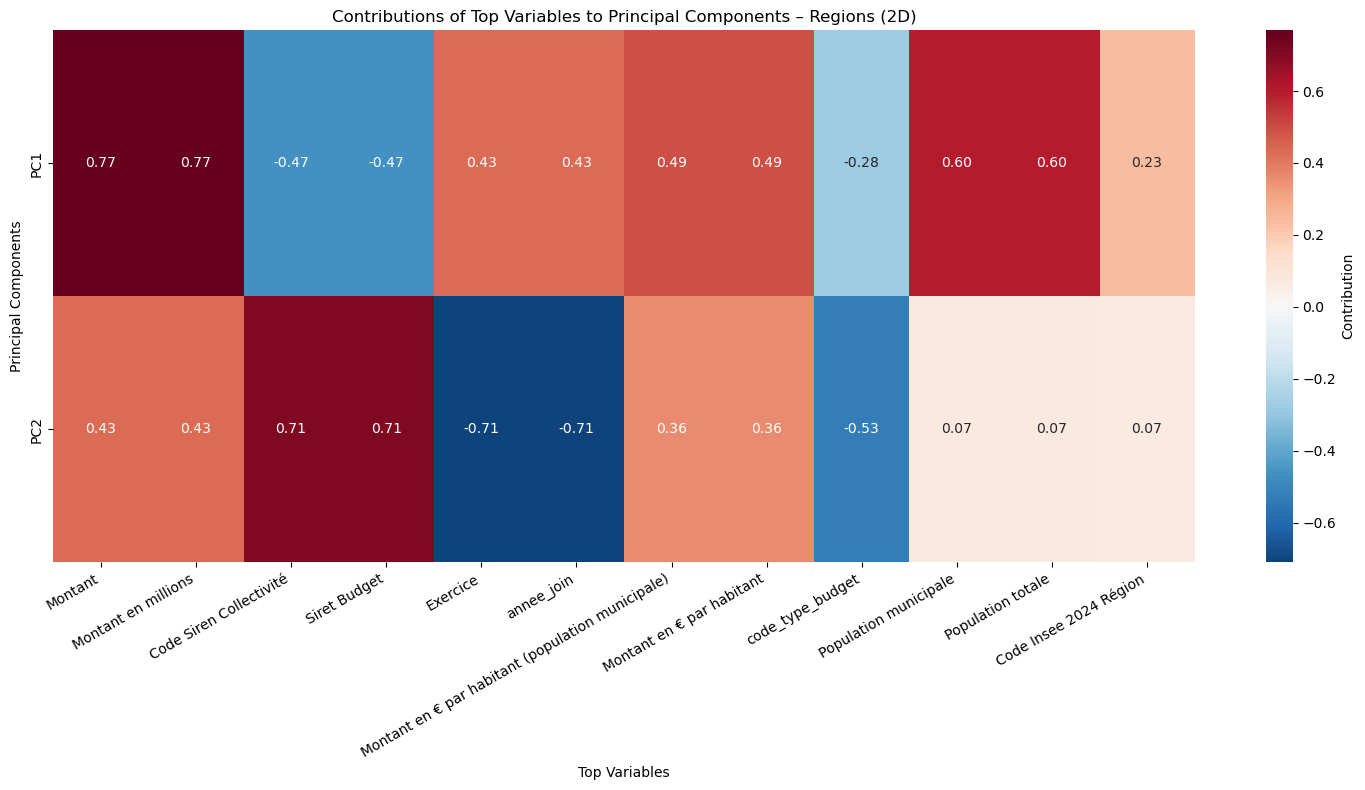

In [55]:
loadings = pca_region.components_.T * np.sqrt(pca_region.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(5, len(explained_var))],
    columns=[f'PC{i+1}' for i in range(min(5, len(explained_var)))],
    index=regions_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Regions (2D)')
plt.tight_layout()
plt.show()


For PC1, the most influential variables are Montant and Montant en millions (0.77), followed by Population totale and Population municipale (0.6). The least influential variables are Code SIREN and SIRET (-0.47). However, it is important to note that some aspects, such as other demographic variables, are not fully captured by just these two components.

For PC2, the variable contributions are almost reversed: Code SIREN and SIRET are the most influential (0.71), while Exercice and Année_join have the least influence (-0.71).

This indicates that PC1 mostly captures the overall financial and demographic size of the regions, whereas PC2 differentiates the regions based on their identifiers.

**Conclusion**: We plotted the data in 2D for visualization, but the scree plot, cumulative variance, and heatmap show that using only two components is not sufficient for a full interpretation. Therefore, we will extend the analysis to a 4D PCA to better capture the variability and relationships in the data.

In [56]:
# 4 dimension PCA now

pca_region_4D = PCA(n_components=4)

# Standardize
regions_scaled = scaler.fit_transform(regions_numeric)

# PCA (2 composants)
pca_results_region_4D = pca_region_4D.fit_transform(regions_scaled)

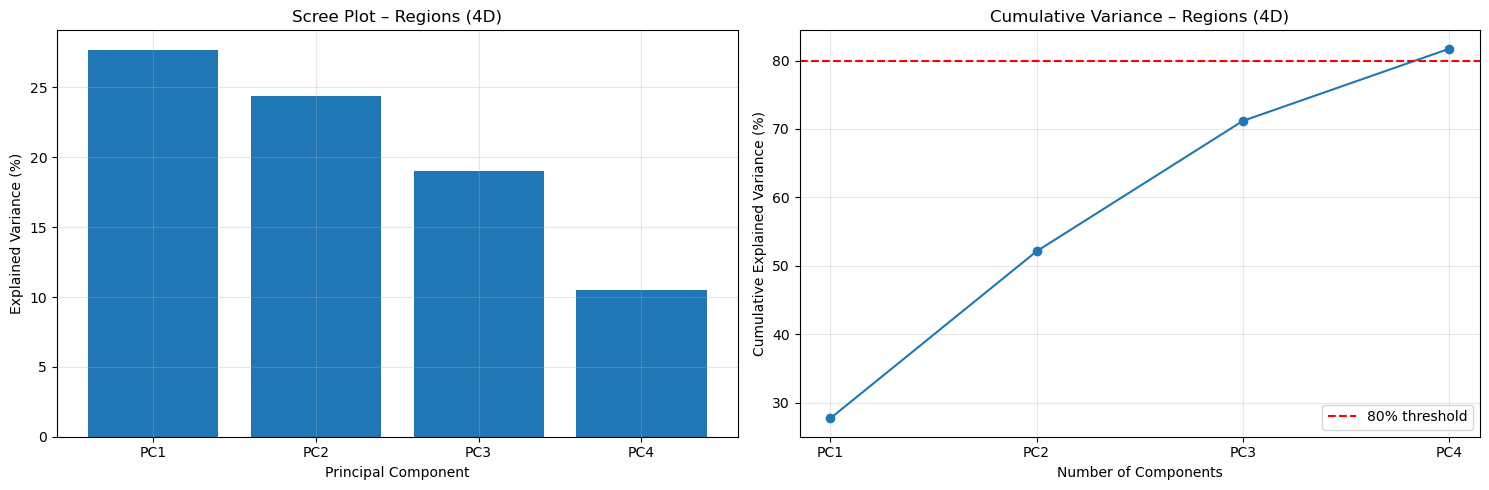

In [57]:
# Explained variance
explained_var_4D = pca_region_4D.explained_variance_ratio_
cumulative_var_4D = np.cumsum(explained_var_4D)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var_4D))], explained_var_4D*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Regions (4D)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var_4D))], cumulative_var_4D*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Regions (4D)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The scree plot shows that PC1 captures approximately 27% of the variance, followed by PC2 (25%), PC3 (19%), and PC4 (11%). The cumulative variance exceeds 80% when including the first four components, indicating that moving to a 4D PCA allows us to capture most of the variability and interpret the dataset more comprehensively.

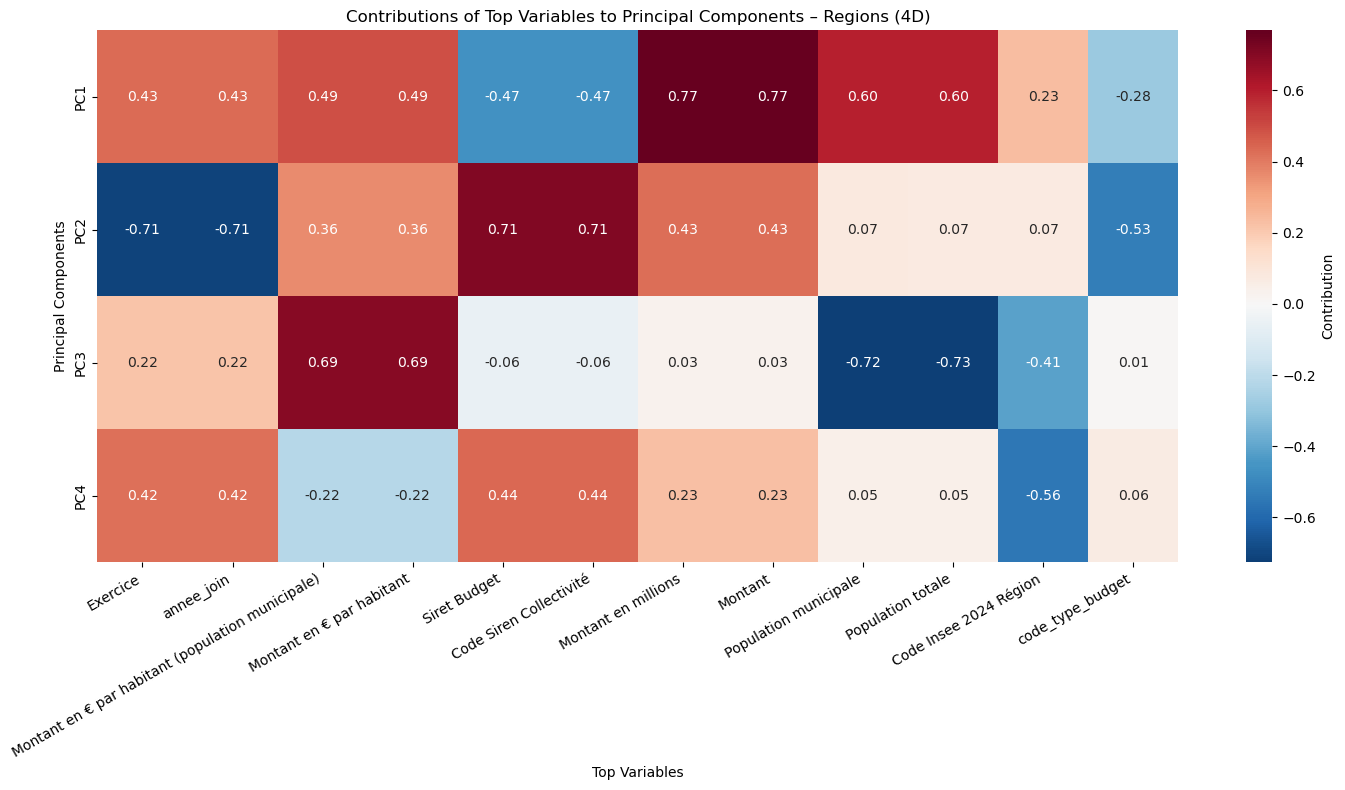

In [58]:
loadings = pca_region_4D.components_.T * np.sqrt(pca_region_4D.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(5, len(explained_var_4D))],
    columns=[f'PC{i+1}' for i in range(min(5, len(explained_var_4D)))],
    index=regions_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Regions (4D)')
plt.tight_layout()
plt.show()


For the PCA of the regional data, PC1 primarily captures the financial aspects (Montant and Montant en millions) and, to a lesser extent, the demographic aspects (Population totale and Population municipale). PC2 mainly reflects the identifiers of the regions, namely Code SIREN and SIRET. PC3 emphasizes Montant per habitant, showing the influence of spending relative to population size. PC4, which explains about 11% of the variance, does not strongly correspond to any single variable; its highest contributions are modest (around 0.4) from SIRET, Code SIREN, and Année_join, indicating it captures residual variation across multiple aspects.

### Départements

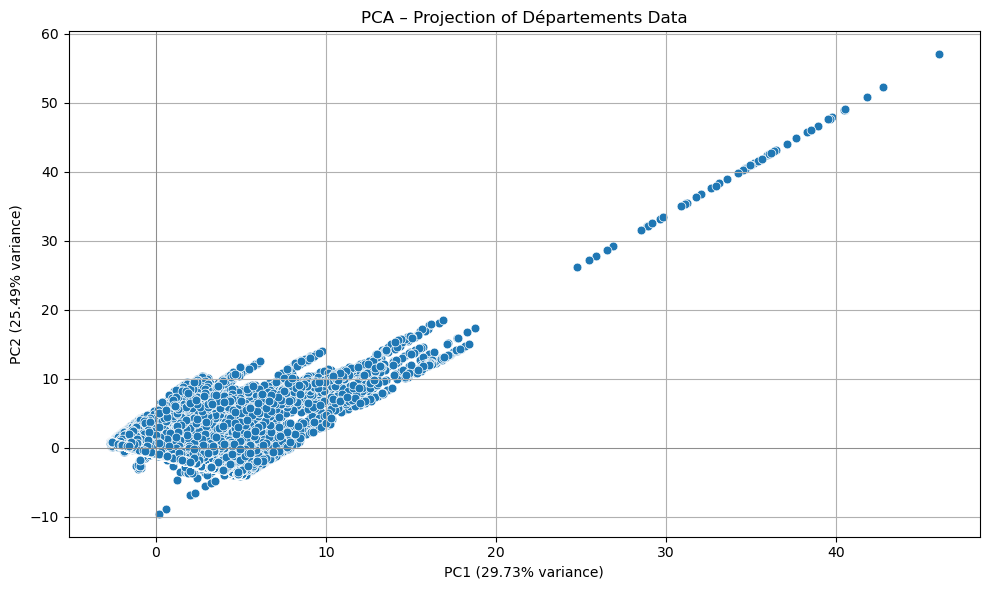

In [59]:
pca_dept = PCA(n_components=2)

departements_numeric = departements_numeric.dropna()   # Clean NaN

# Standardize
departements_scaled = scaler.fit_transform(departements_numeric)

# PCA (2 composants)
pca_results_depts = pca_dept.fit_transform(departements_scaled)

df_pca_dept = pd.DataFrame({
    "PC1": pca_results_depts[:, 0],
    "PC2": pca_results_depts[:, 1]
})

# Scatterplot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca_dept, s=40)
plt.title("PCA – Projection of Départements Data")
plt.xlabel(f"PC1 ({pca_dept.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca_dept.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)
plt.grid()
plt.tight_layout()
plt.show()

The PCA projection of department-level data shows a dense cluster of points concentrated roughly between –3 and 20 on PC1 and –5 and 20 on PC2. Beyond this main cluster, there is a separate group forming a “tail” that starts around (25, 25) and extends to approximately (40, 50), representing departments that deviate from the central pattern. Additionally, a few isolated outliers are observed farther away, up to around (55, 55). Overall, most departments share similar profiles, while a smaller subset diverges, forming distinct secondary clusters or extreme outliers.

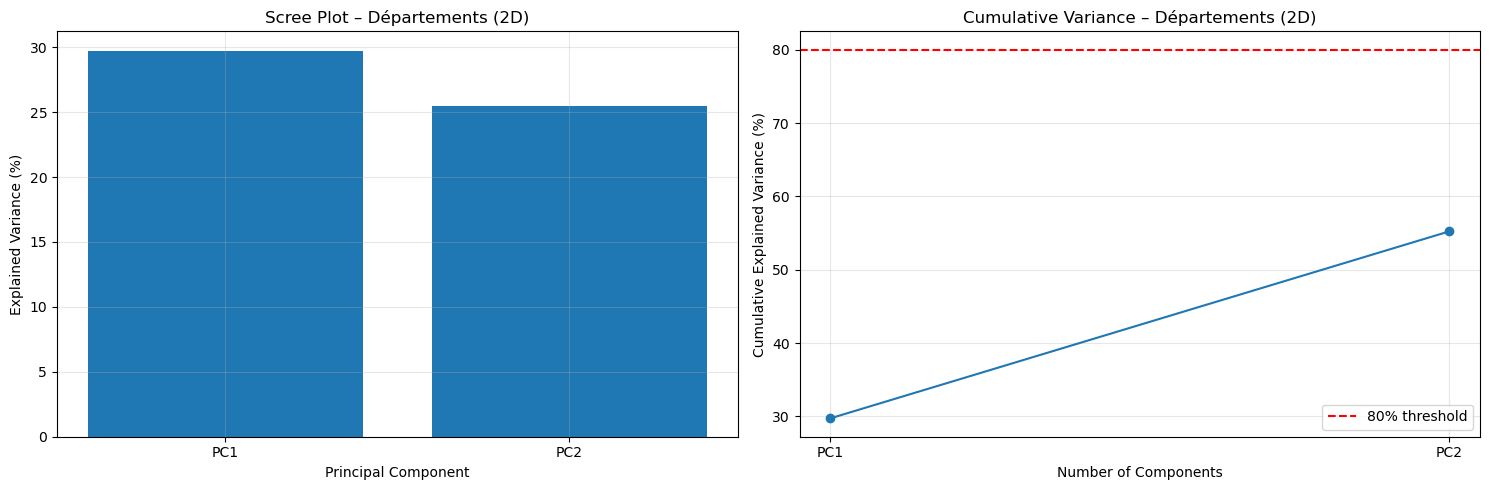

In [60]:
# Explained variance
explained_var_dept = pca_dept.explained_variance_ratio_
cumulative_var_dept = np.cumsum(explained_var_dept)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var_dept))], explained_var_dept*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Départements (2D)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var_dept))], cumulative_var_dept*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Départements (2D)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The scree plot for the departments shows that the first principal component (PC1) captures approximately 30% of the total variance, while the second component (PC2) adds around 25% more. Together, PC1 and PC2 explain about 55% of the variance, which indicates that these two components capture part of the structure of the departmental data but not enough for a full interpretation. The cumulative variance confirms this, rising from 30% with PC1 to 55% with PC2, but still leaving nearly half of the variability unexplained. This shows that relying only on the first two components is insufficient, and additional components are needed to properly represent and interpret the departmental dataset.

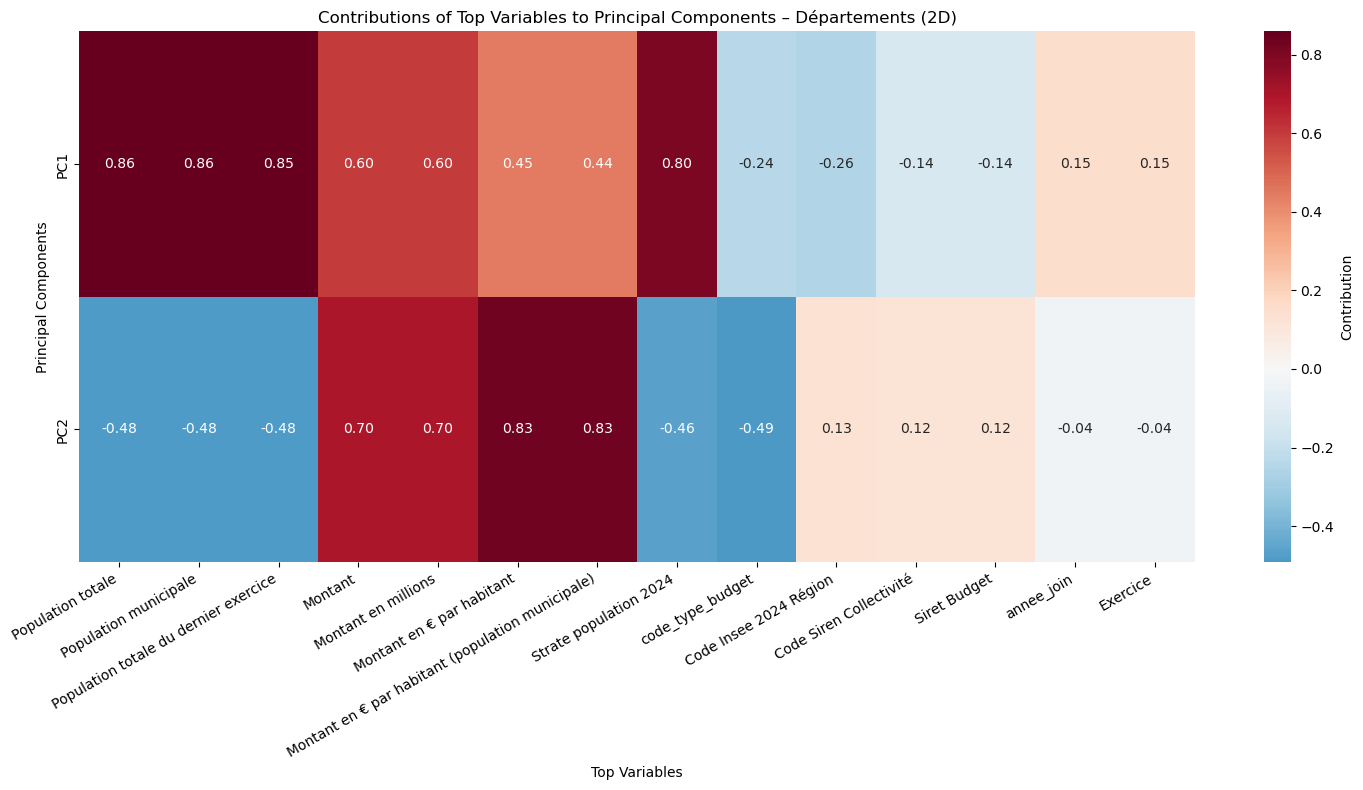

In [61]:
# Heatmap of PCA loadings (top 5 components)
loadings = pca_dept.components_.T * np.sqrt(pca_dept.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(5, len(explained_var_dept))],
    columns=[f'PC{i+1}' for i in range(min(5, len(explained_var_dept)))],
    index=departements_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Départements (2D)')
plt.tight_layout()
plt.show()


For the heatmap of the PCA loadings on the departmental data, PC1 shows a very strong correlation with the population variables, with values between 0.80 and 0.86, and also a strong correlation with Montant and Montant en millions. This indicates that PC1 mainly captures the demographic size and overall financial volume of the departments.

PC2 shows a very strong correlation with Montant per habitant (0.83) and a strong correlation with Montant (0.70), meaning that it mostly reflects differences in spending intensity relative to population.

Taken together, PC1 and PC2 capture meaningful aspects of the data, but they do not explain dimensions related to variables such as Année_join, Code SIREN Collectivité, or SIRET Budget, meaning that part of the dataset’s structure remains unrepresented. Combined with the cumulative variance, which remains well below the 80% threshold after the first two components, it becomes clear that we lack sufficient dimensional coverage to properly interpret the departmental data. As with the regional analysis, we will therefore extend the PCA to four components (4D) to better capture the full variability of the dataset.

In [62]:
# 4 dimension PCA now

pca_dept_4D = PCA(n_components=4)

# Standardize
depts_scaled = scaler.fit_transform(departements_numeric)

# PCA (2 composants)
pca_results_dept_4D = pca_dept_4D.fit_transform(depts_scaled)

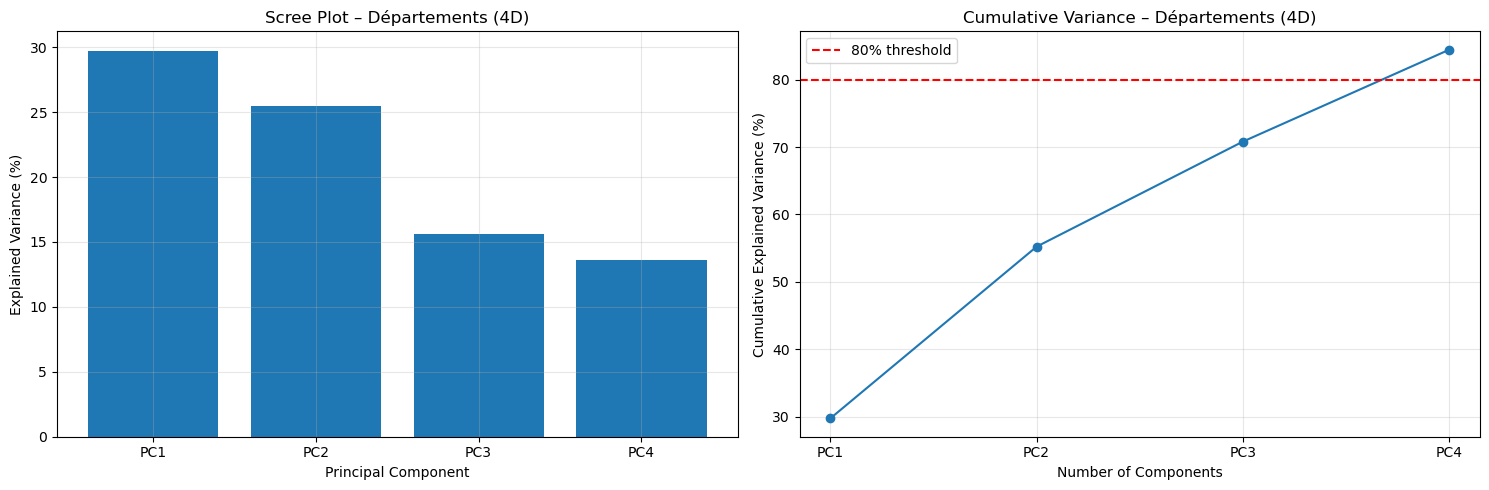

In [63]:
# Explained variance
explained_var_4D = pca_dept_4D.explained_variance_ratio_
cumulative_var_4D = np.cumsum(explained_var_4D)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var_4D))], explained_var_4D*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Départements (4D)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var_4D))], cumulative_var_4D*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Départements (4D)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

When extending the PCA for the departments to four dimensions, the cumulative explained variance rises to nearly 90%, which is a substantial improvement compared to the 55% captured by only the first two components. This result shows that adding PC3 and PC4 was essential to better represent the complexity of the dataset. With four components, the PCA now captures most of the underlying structure of the departmental data, allowing for a much more reliable and comprehensive interpretation.

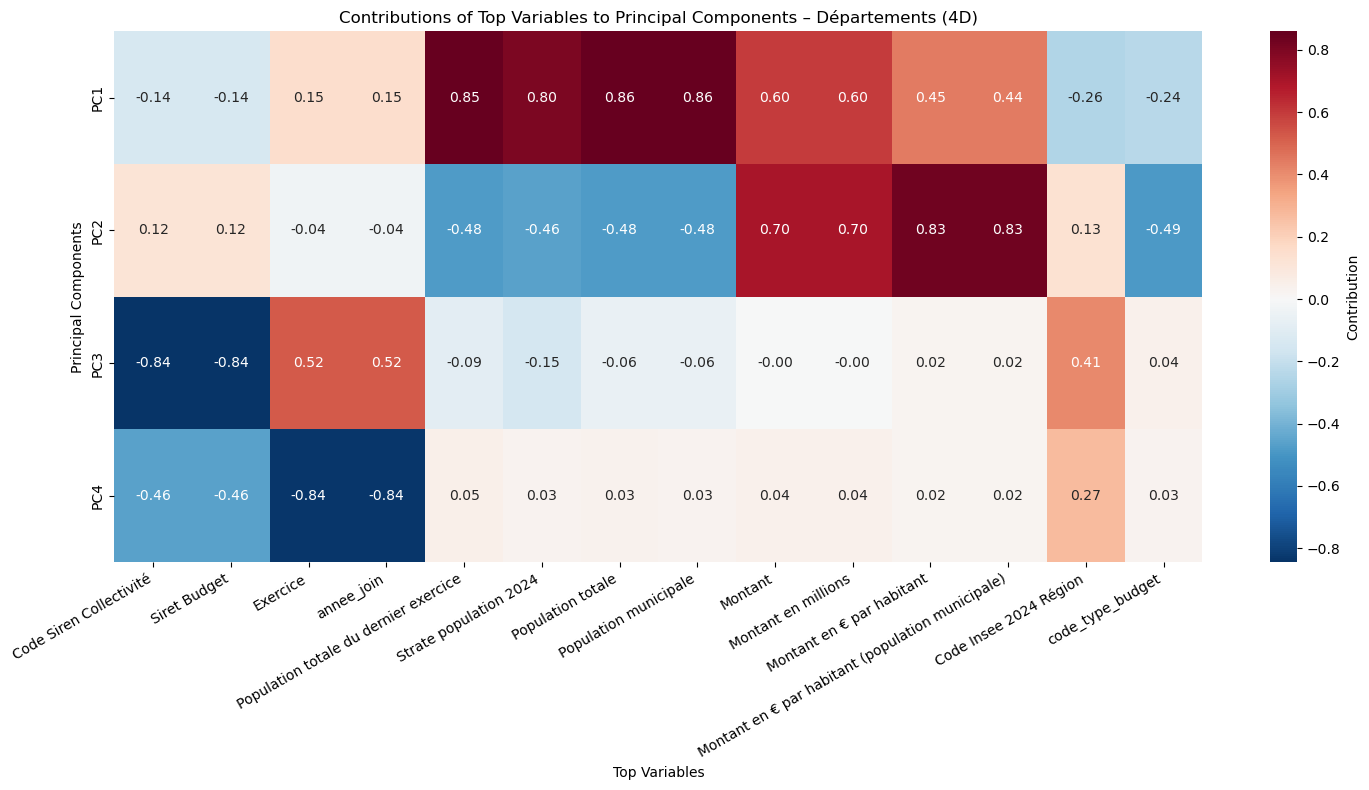

In [64]:
loadings = pca_dept_4D.components_.T * np.sqrt(pca_dept_4D.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(5, len(explained_var_4D))],
    columns=[f'PC{i+1}' for i in range(min(5, len(explained_var_4D)))],
    index=departements_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Départements (4D)')
plt.tight_layout()
plt.show()


However, when examining the heatmap in 4D, we observe that PC1 shows a very strong correlation with the population variables (Population totale, Population municipale, Strate population 2024), ranging from 0.80 to 0.86, as well as a strong correlation with Montant (around 0.60) and a moderate correlation with Montant par habitant (around 0.45). PC2 presents a very strong correlation with Montant par habitant (0.83) and a strong correlation with the Montant variables.

In contrast, PC3 does not exhibit strong relationships with most variables, except for a moderate correlation with Année (0.52) and Code INSEE (0.41). PC4 shows virtually no meaningful correlation, with only a weak loading on Code INSEE (0.27).

In **conclusion**, although the cumulative variance clearly demonstrates the necessity of using four components to properly represent the dataset, the heatmap interpretation suggests that the additional dimensions (PC3 and PC4) contribute little in terms of meaningful variable structure. Their main role is therefore not interpretative but rather mathematical, allowing PC1 and PC2 to strengthen their strong and very strong correlations — something that was not possible with only two dimensions.

### Communes

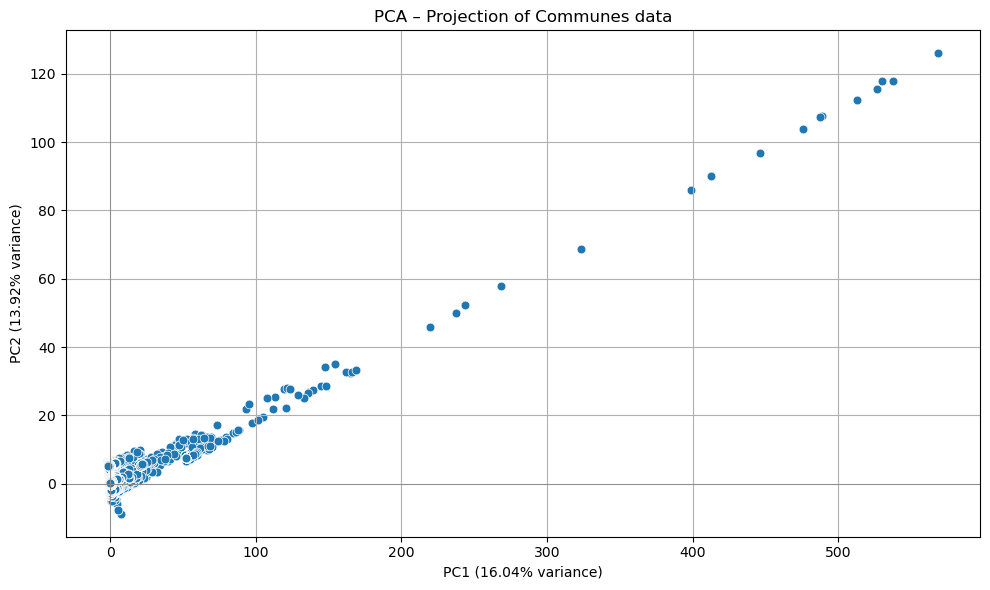

In [65]:
pca_communes = PCA(n_components=2)

communes_numeric = communes_numeric.dropna()   # Clean NaN

# Standardize
communes_scaled = scaler.fit_transform(communes_numeric)

# PCA (2 composants)
pca_results_commune = pca_communes.fit_transform(communes_scaled)

df_pca_commune = pd.DataFrame({
    "PC1": pca_results_commune[:, 0],
    "PC2": pca_results_commune[:, 1]
})

# Scatterplot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca_commune, s=40)
plt.title("PCA – Projection of Communes data")
plt.xlabel(f"PC1 ({pca_communes.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca_communes.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)
plt.grid()
plt.tight_layout()
plt.show()

The PCA projection of commune-level data reveals a large dense cluster at the beginning, roughly between 0 and 150 on PC1 and –10 to 30 on PC2. Beyond this main cluster, there is a linear sequence of outliers, spaced at varying intervals, extending up to approximately (570, 130). This pattern indicates that while most communes have similar characteristics, a subset of communes exhibits more extreme or distinct profiles, forming a continuous tail of outlying points.

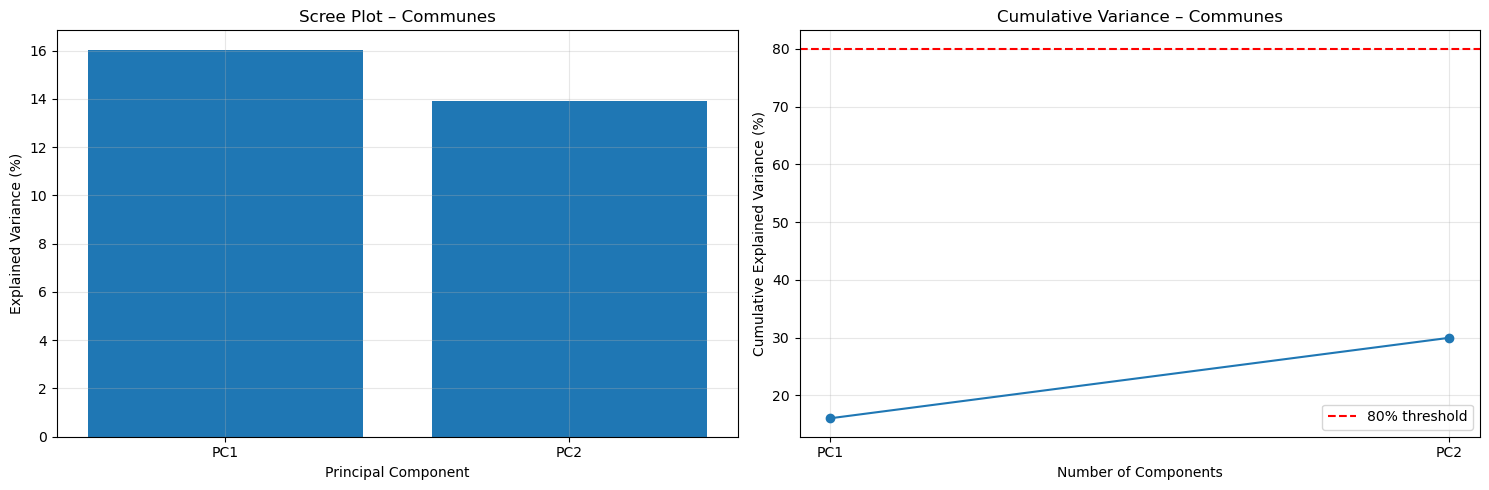

In [66]:
# Explained variance
explained_var = pca_communes.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var))], explained_var*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Communes')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var))], cumulative_var*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Communes')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

For the communes, the scree plot shows that PC1 explains only 16% of the variance, while PC2 adds 14%, resulting in a cumulative variance of just 30%. This is extremely low compared to the usual 80% threshold expected for a reliable interpretation. Such a low cumulative variance indicates that the first two components capture only a small portion of the structure of the communal data. Once again, a 2D projection is clearly insufficient, and we will need to extend the analysis to a 4D PCA to better capture the underlying variability and obtain a more meaningful interpretation.

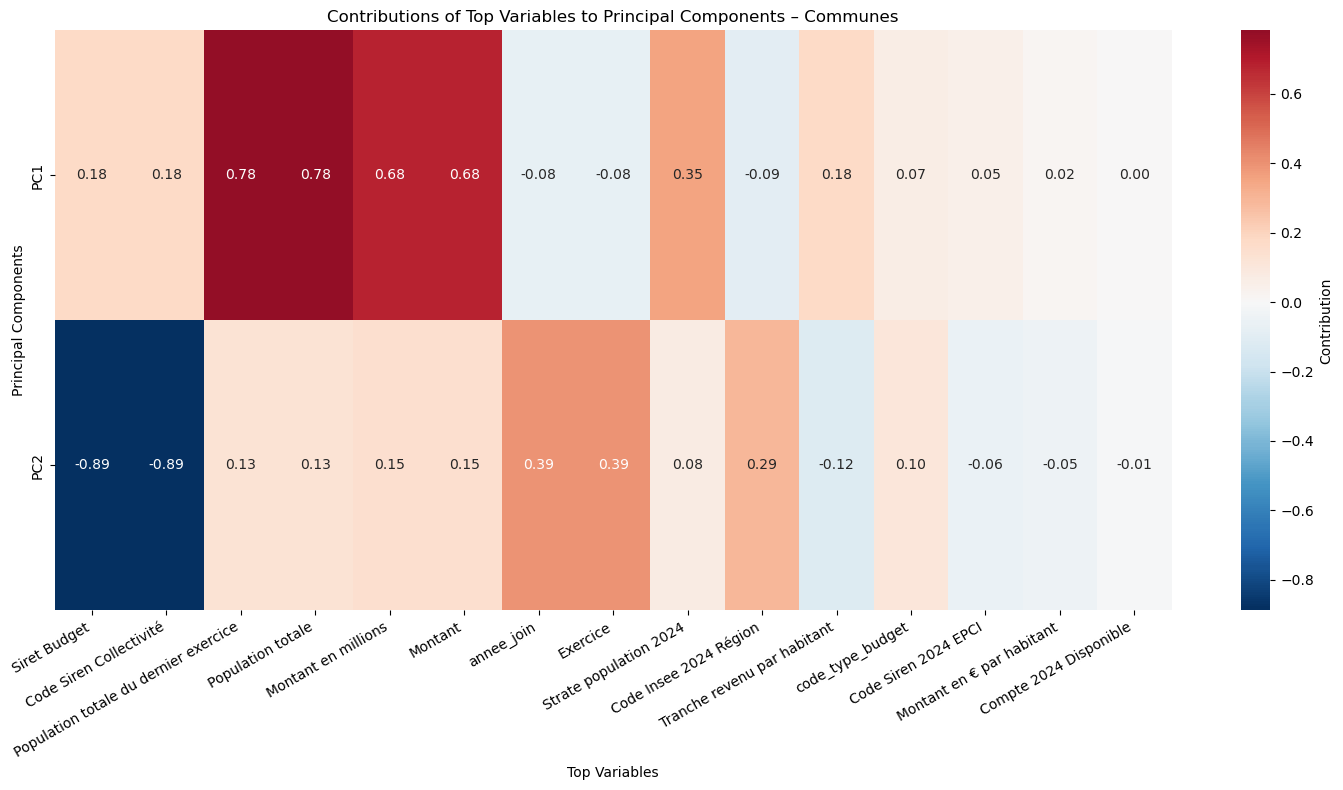

In [67]:
# Heatmap of PCA loadings (top 5 components)
loadings = pca_communes.components_.T * np.sqrt(pca_communes.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(5, len(explained_var))],
    columns=[f'PC{i+1}' for i in range(min(5, len(explained_var)))],
    index=communes_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Communes')
plt.tight_layout()
plt.show()

For the heatmap of the PCA loadings for the communes, PC1 shows a very strong correlation with Population totale (0.78) and also a strong correlation with the Montant variables (around 0.68). PC2 does not display any strong relationship with a specific variable, with its highest loading reaching only 0.39 for Année_join, which remains relatively weak. This means that, as observed in the regional and departmental analyses, the first two components do not sufficiently explain the underlying structure of the communal data. Consequently, it is again necessary to extend the analysis to a 4D PCA in order to capture more variance and obtain a more meaningful interpretation of the dataset.

In [68]:
# 4 dimension PCA now

pca_commune_4D = PCA(n_components=8)

# Standardize
communes_scaled = scaler.fit_transform(communes_numeric)

# PCA (2 composants)
pca_results_communes_4D = pca_commune_4D.fit_transform(communes_scaled)

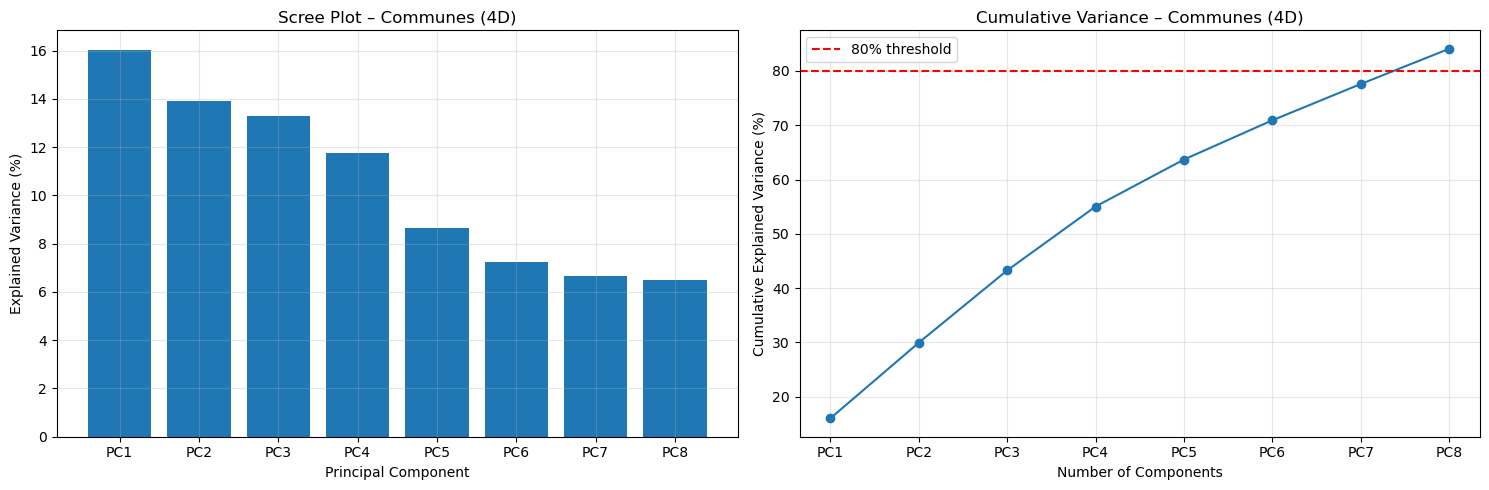

In [ ]:
# Explained variance
explained_var_4D = pca_commune_4D.explained_variance_ratio_
cumulative_var_4D = np.cumsum(explained_var_4D)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar([f'PC{i+1}' for i in range(len(explained_var_4D))], explained_var_4D*100)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('Scree Plot – Communes (8D)')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot([f'PC{i+1}' for i in range(len(cumulative_var_4D))], cumulative_var_4D*100, 'o-')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance (%)')
axes[1].set_title('Cumulative Variance – Communes (8D)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Using 4 components (4D), the cumulative explained variance reaches only about 55%, which is clearly insufficient to capture the majority of the dataset’s variability, as we can see on the cumulative variance plot on the right. After several tests, it was found that a minimum of 8 components is required to reach a cumulative variance of around 85%, providing a reliable representation of the communal data. As we can also observe on the graph, PC7 reaches approximately 77–78%, which is still slightly below the typical 80% threshold, confirming that higher dimensions are necessary for a complete interpretation.

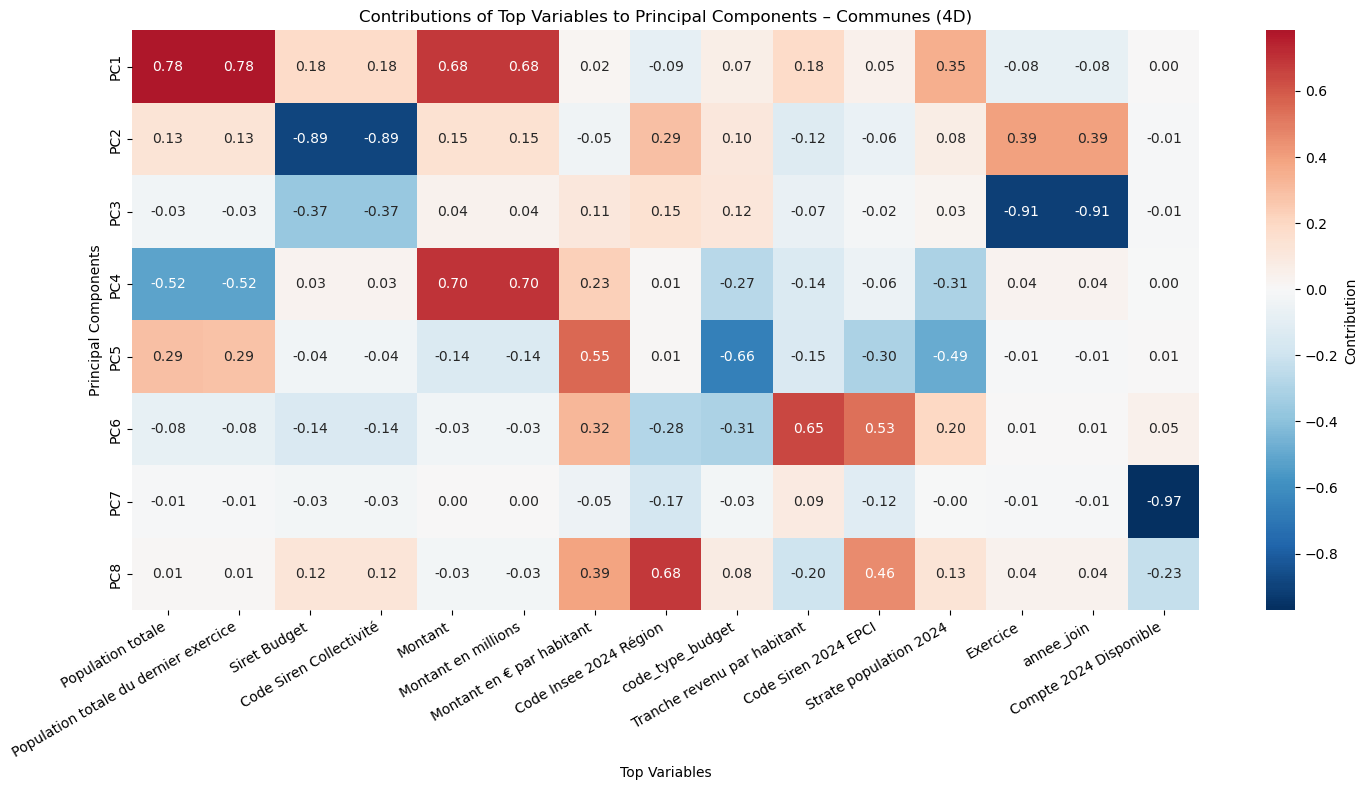

In [ ]:
loadings = pca_commune_4D.components_.T * np.sqrt(pca_commune_4D.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings[:, :min(8, len(explained_var_4D))],
    columns=[f'PC{i+1}' for i in range(min(8, len(explained_var_4D)))],
    index=communes_numeric.columns
)

plt.figure(figsize=(15, 8))
top_vars = loading_matrix.abs().sum(axis=1).sort_values(ascending=False).head(20)

sns.heatmap(loading_matrix.loc[top_vars.index].T, 
            cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={'label': 'Contribution'})
plt.ylabel('Principal Components')
plt.xlabel('Top Variables')
plt.xticks(rotation=30, ha='right')
plt.title('Contributions of Top Variables to Principal Components – Communes (8D)')
plt.tight_layout()
plt.show()


For the 8D PCA on the communes, the heatmap shows that PC1 has a very strong correlation with Population totale (0.78) and a strong correlation with Montant (0.68). PC4 also exhibits a strong correlation with Montant (0.70), while PC5 is primarily associated with Montant par habitant. PC6 shows a strong correlation with Tranche revenu par habitant (0.65) and Code SIREN (0.53), and PC8 is mainly correlated with Code INSEE (0.68).

Overall, the PCA captures well the Montants, Montant par habitant, and Population totale, but other variables, such as Population municipale or Année_join, are not adequately represented.

**Conclusion**: Even with an 8D PCA, which reaches a cumulative variance of around 85%, the interpretation of all variables in the communal dataset remains incomplete. While the variance is well captured numerically, the PCA does not fully reflect the structure of certain key variables, highlighting the complexity of the dataset and the limitations of PCA in representing all aspects in a reduced-dimensional space.